<a href="https://colab.research.google.com/github/kelliesyhh/t3-2d-ddw/blob/main/T3_2D_DDW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01.020 Design Thinking Project III - Term 3** 
### SC02 Group 1
* Chua Min Pei (1005340)
* Sim Yu Hui, Kellie (1004204)
* Ryan Kaw Zheng Da (1005144)
* Eunice Kwok Xiu Yi (1005469)
* Ng Zhen An (1005527)

---

Task 1: Build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

* Find data sets for the number of deaths in various countries (a minimum of 20 countries) due to COVID-19.
* Research for appropriate predictor variables to predict deaths due to COVID-19.
* You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
*  Find data sets on the chosen predictors for the various countries in the model.
* Use plots to visualize and understand your data.
* Build a model and test the accuracy of your model, using an appropriately chosen metric
(hint: r2 is not a good metric for this task).
* If needed, improve your model by incorporating other predictors, and/or removing existing ones.
*Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.


---


Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.
* Find an interesting problem which you want to solve either using Linear Regression or Classification (please check with your instructors first on whether the problem makes sense).
* Find a dataset to build your model. For example, you can use Kaggle
(https://www.kaggle.com/datasets) to find suitable datasets.
* Use plots to visualize and understand your data.
* Create training and test data sets.
* Build your model.
* Choose an appropriate metric to evaluate your model (you may use the same metric as the one used in Task 1).
* Improve your model.

  

# Task 1

Task 1: Build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

* Find data sets for the number of deaths in various countries (a minimum of 20 countries) due to COVID-19.
* Research for appropriate predictor variables to predict deaths due to COVID-19.
* You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
*  Find data sets on the chosen predictors for the various countries in the model.
* Use plots to visualize and understand your data.
* Build a model and test the accuracy of your model, using an appropriately chosen metric
(hint: r2 is not a good metric for this task).
* If needed, improve your model by incorporating other predictors, and/or removing existing ones.
*Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.


---


For Task 1, an implementation of your final multiple linear regression model in Excel; the Excel spreadsheet needs to be annotated and interactive (i.e. contains formulas, so that changing the data input results in different output).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Process Data

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

In [4]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

Cloning into 't3-2d-ddw'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 63 (delta 30), reused 45 (delta 17), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [5]:
# !git clone https://github.com/owid/covid-19-data

In [6]:
# Import dataset
# file_url = 'covid-19-data/public/data/owid-covid-data.csv'
file_url = 't3-2d-ddw/task-1/owid-covid-data-1811.csv'
df = pd.read_csv(file_url)
df.reset_index(drop=True, inplace=True)

# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes 

In [5]:
# # grouping by country, with countries_list from task 2
# countries_list = ['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
#        'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
#        'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
#        'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
#        'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
#        'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GTM', 'GUY', 'HTI',
#        'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
#        'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
#        'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
#        'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
#        'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
#        'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
#        'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
#        'ZWE']
# grouped = df.groupby(['iso_code'])
# print(df['iso_code'].unique())
# print(len(df['iso_code'].unique()))
# dict_df = {}
# for code in countries_list:
#   dict_df[code] = grouped.get_group(code)
#   # uncomment to save to csv file for idk what reason
#   # dict_df[code].to_csv("task-1_" + code + ".csv")

# # testing interpolation
# for key, value in dict_df.items():
#   value.interpolate(method='linear', axis=0, inplace=True, limit_direction='both')

In [6]:
# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


In [8]:
# Determine the correlation between total deaths and all other features
corrMatrix = df.corr()
pd.set_option('display.max_rows', None)
deaths_corr = pd.DataFrame(corrMatrix['total_deaths_per_million'])
deaths_corr

,total_deaths_per_million
total_cases,0.138053
new_cases,0.078256
new_cases_smoothed,0.080095
total_deaths,0.162961
new_deaths,0.078845
new_deaths_smoothed,0.082513
total_cases_per_million,0.777060
new_cases_per_million,0.309532
new_cases_smoothed_per_million,0.364672
total_deaths_per_million,1.000000


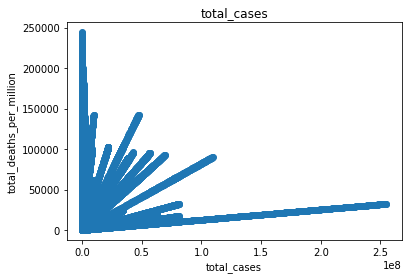

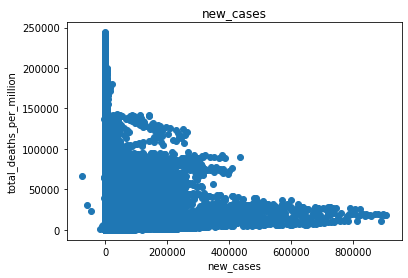

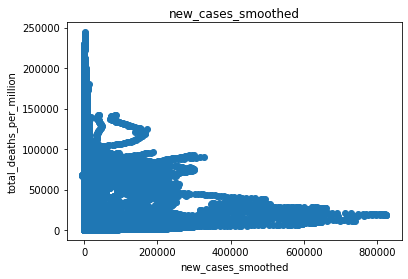

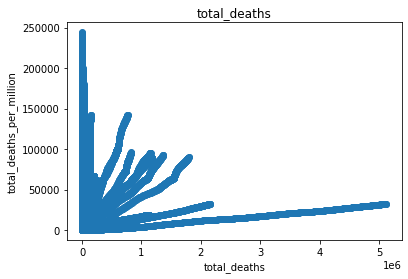

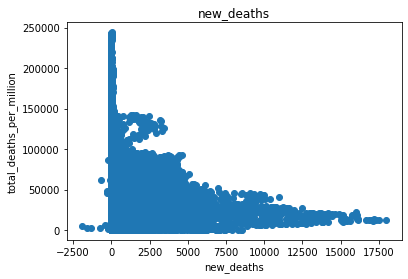

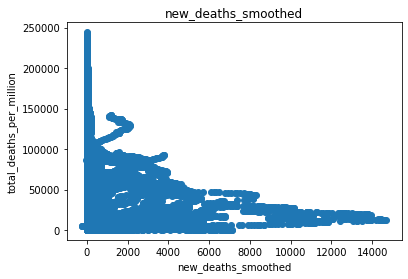

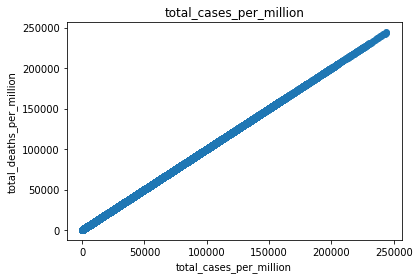

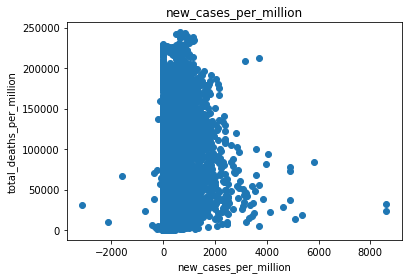

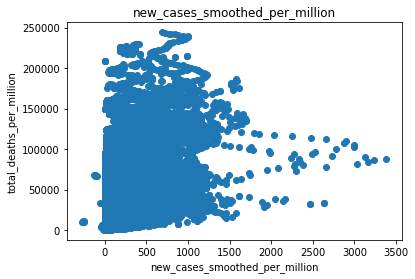

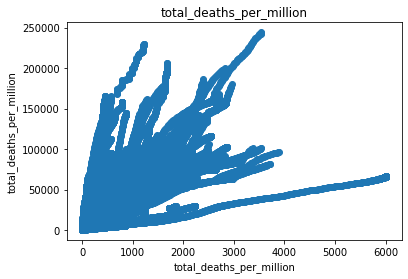

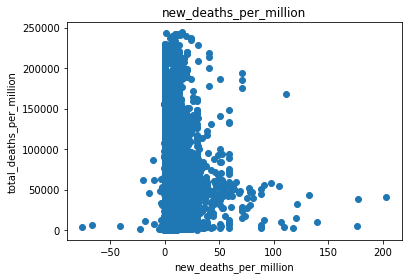

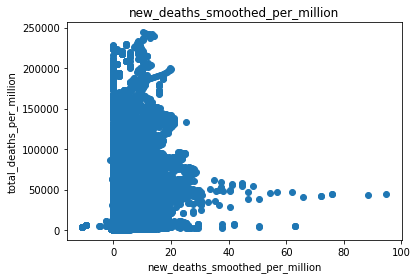

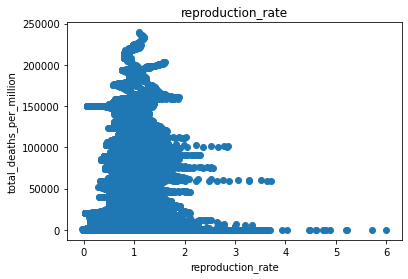

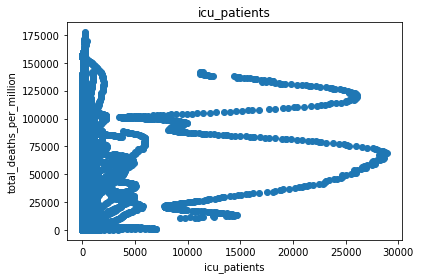

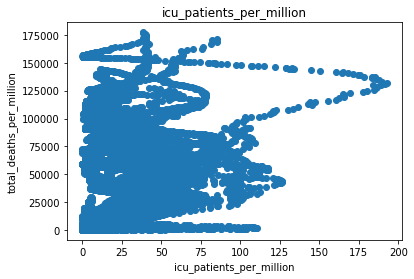

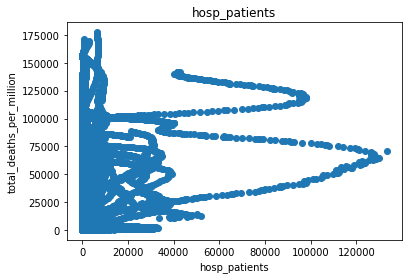

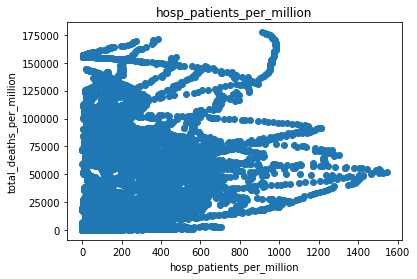

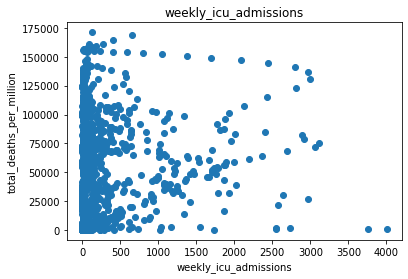

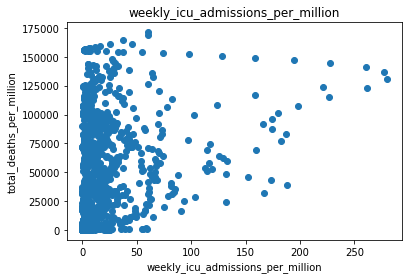

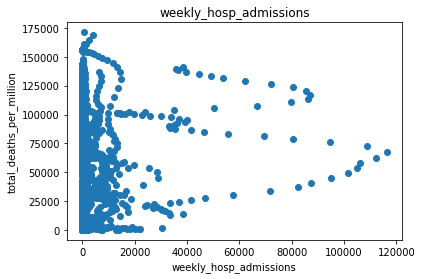

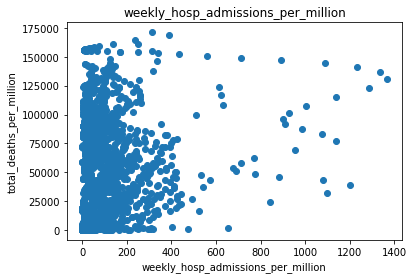

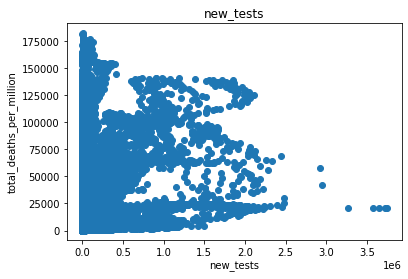

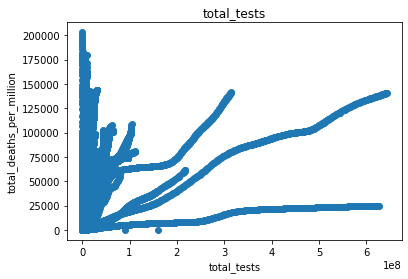

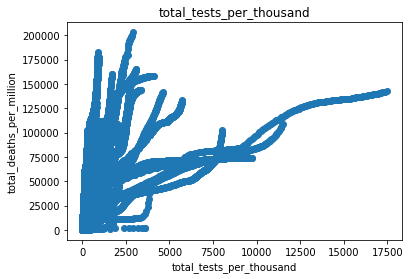

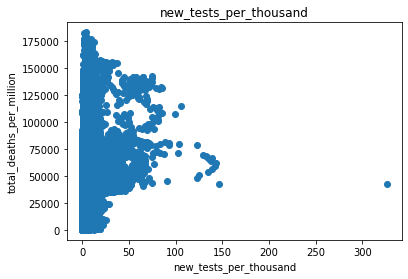

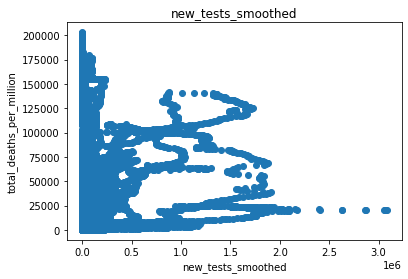

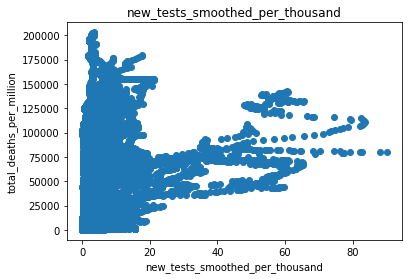

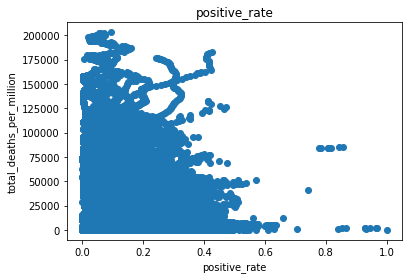

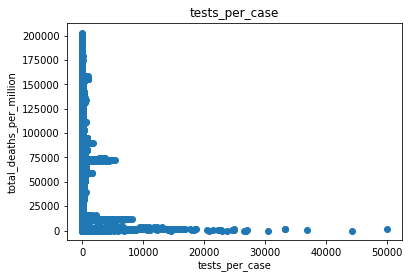

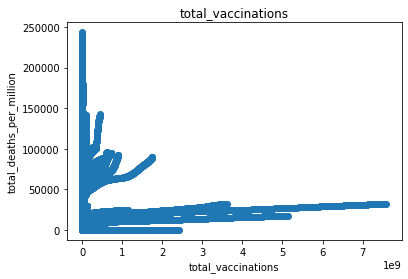

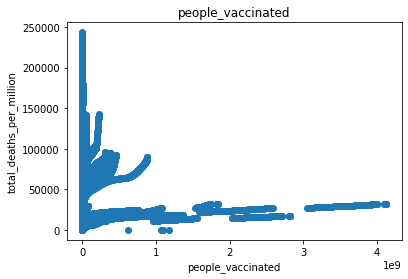

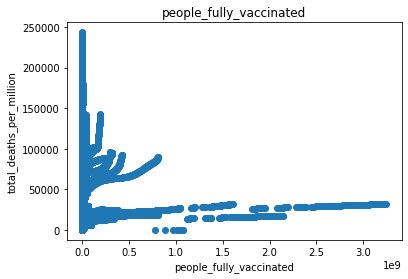

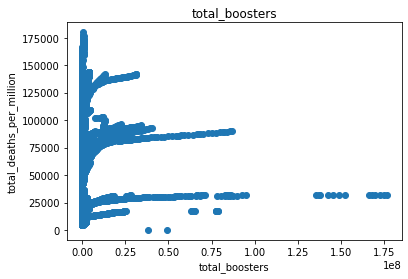

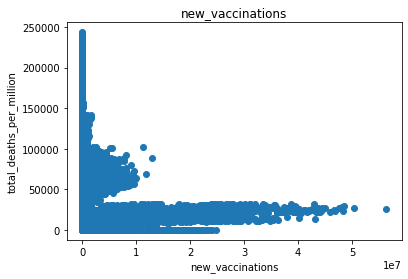

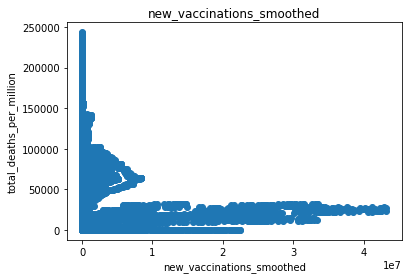

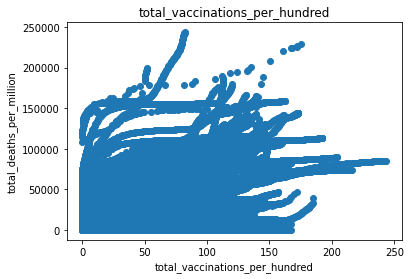

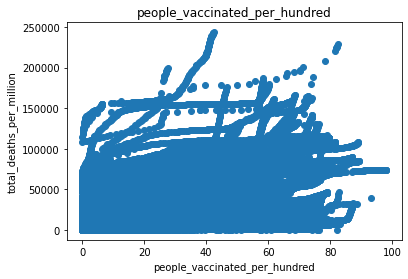

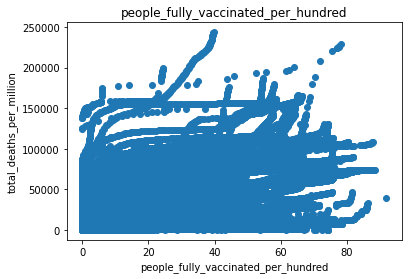

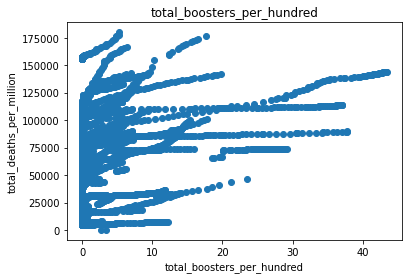

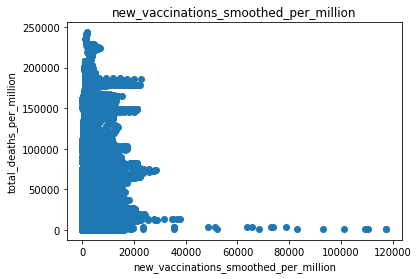

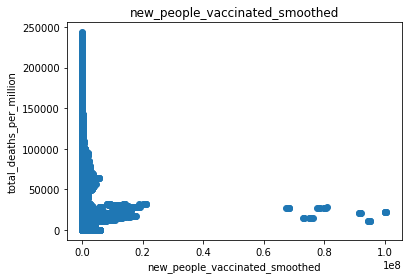

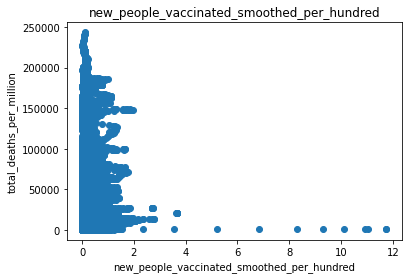

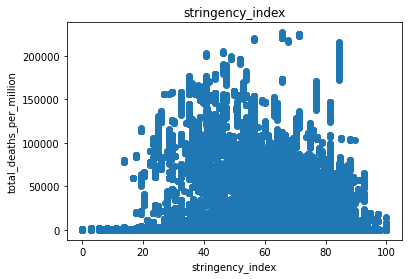

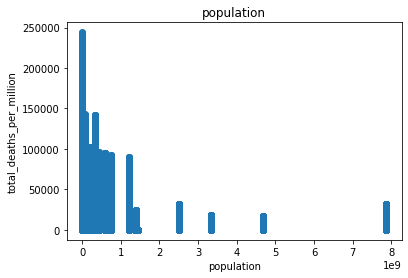

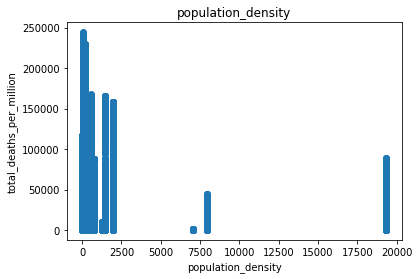

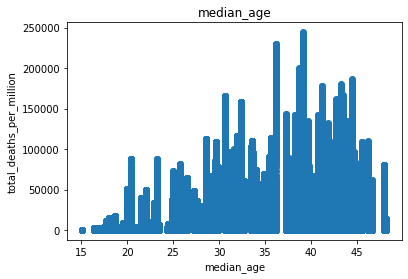

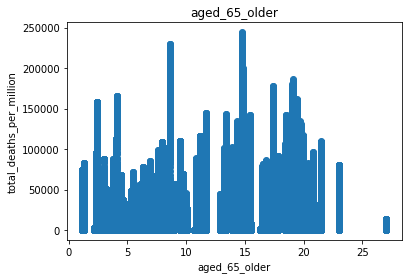

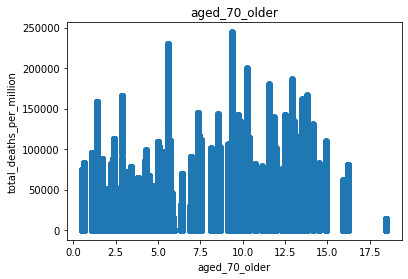

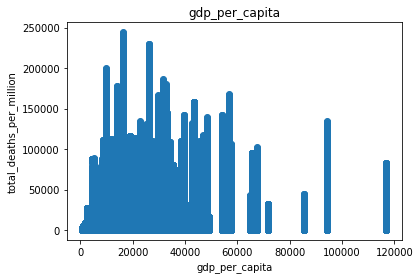

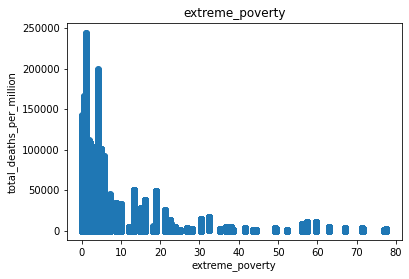

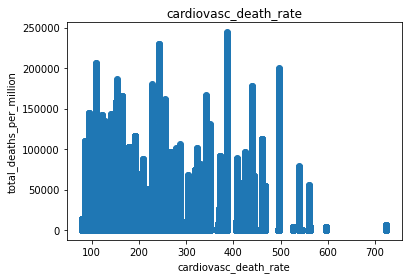

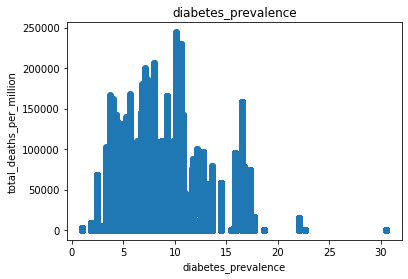

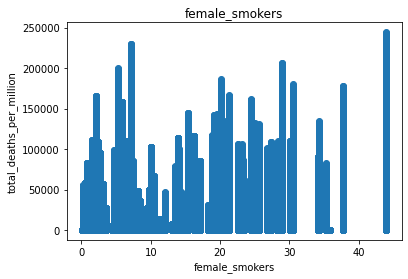

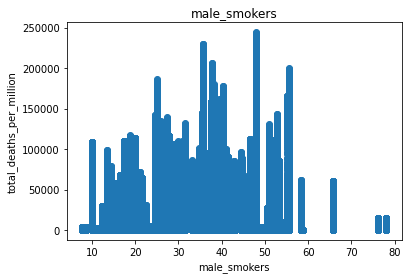

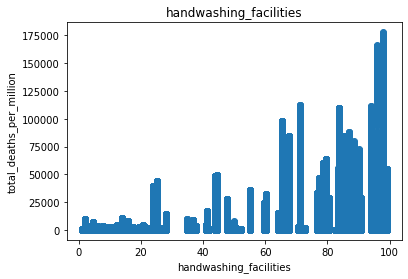

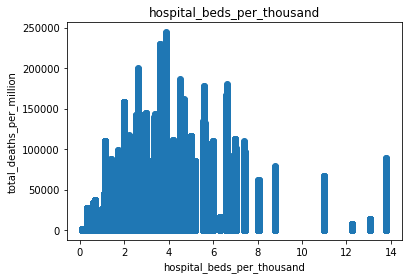

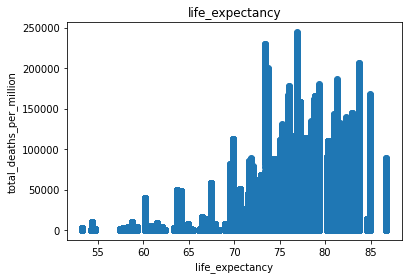

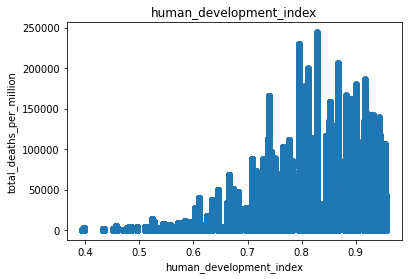

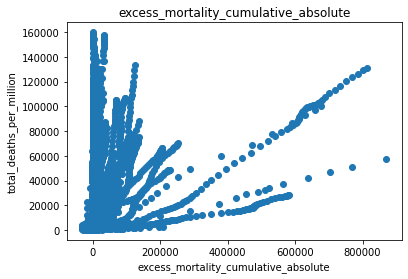

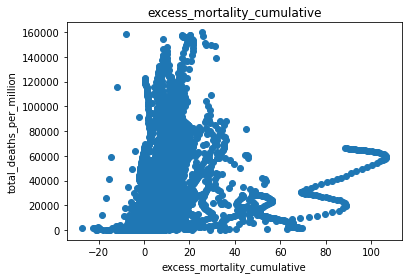

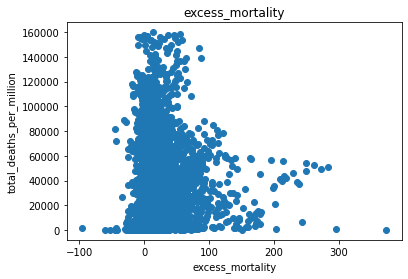

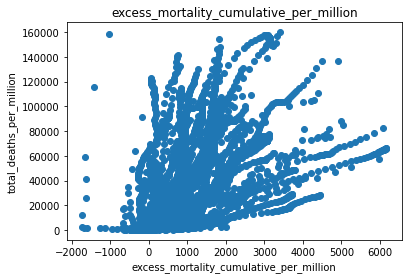

In [9]:
# Plot predictor variables against total deaths
for row in deaths_corr.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_deaths_per_million")
  plt.title(col_name)
  plt.scatter(df[col_name], df["total_cases_per_million"])
  plt.show()

In [10]:
# sns.pairplot(data=df)

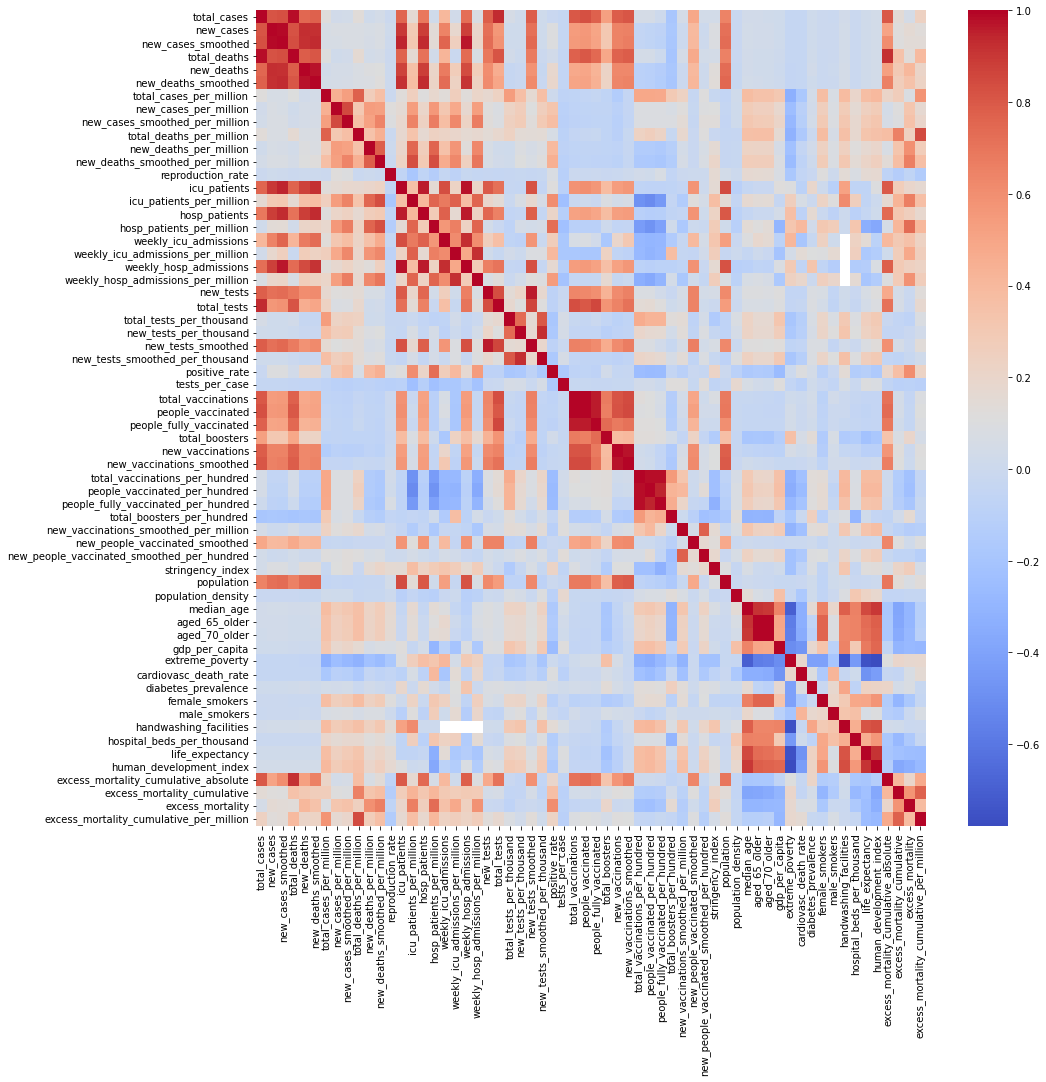

In [11]:
plt.figure(figsize = (15,15))
sns.heatmap(corrMatrix, cmap="coolwarm", annot=False)
plt.show()

## Multiple Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [ ]:
def normalize_z(df):
  '''
  normalise z - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  # dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def get_features_targets(df, feature_names, target_names):
  '''
  get a pandas.DataFrame corresponding to the features and targets respectively
  :param df: pandas.DataFrame, full dataset
  :param feature_names: list, names of columns to be used as features
  :param target_names: list, names of columns to be used as targets
  return pandas.DataFrame, pandas.DataFrame
  '''
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector, 
  and add a column of '1's in the first column
  :param df_feature: pandas.DataFrame, values of features
  return numpy.array
  '''
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector
  :param df_feature: pandas.DataFrame, values of targets
  return numpy.array
  '''
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    res = np.sum((y - ypred) ** 2)
    ymean = np.mean(y)
    tot = np.sum((y - ymean) ** 2)
    r2 = 1- res/tot
    print(r2)
    return r2

def mean_squared_error(target, pred):
    ysum = np.sum((target - pred) ** 2)
    n = target.shape[0]
    return ysum/n

In [ ]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [ ]:
def multiple_linear_regression(df_features, df_target, country):
  # Split the data set into training and test
  # df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=None, test_size=0.3)

  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  alpha = 0.01
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  return beta

  # # call the predict() method
  # # pred = predict(df_features_test, beta)

  # # Plotting figures for visualisation
  # plt.figure()
  # plt.title(country)
  # plt.plot(J_storage)
  # plt.figure()
  # plt.title(country)
  # plt.scatter(df_features_test["total_cases_per_million"], np.array(df_target_test), color='blue')
  # plt.scatter(df_features_test["total_cases_per_million"], pred, color='orange')
  # # plt.scatter(list(range(len(df_features_train))), target, color='blue')         
  # # plt.scatter(list(range(len(df_features_test))), pred, color='black')
  # plt.show()

Predictor Variables (X)

Variable (X) | Description | Category
-------------------|------------------ | ------------------
total_cases_per_million   | Total confirmed cases of COVID-19 per 1,000,000 people | Confirmed cases
new_cases_per_million   | New confirmed cases of COVID-19 per 1,000,000 people | Confirmed cases
people_vaccinated_per_hundred      | Total number of people who received at least one vaccine dose per 100 people in the total population | Vaccinations 
stringency_index | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response) | Policy responses
population | Population (latest available values) | Others
median_age | Median age of the population, UN projection for 2020 | Others
aged_65_older | Share of the population that is 65 years and older, most recent year available | Others
aged_70_older | Share of the population that is 70 years and older in 2015 | Others
gdp_per_capita | Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available | Others
cardiovasc_death_rate | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) | Others
diabetes_prevalence | Diabetes prevalence (% of population aged 20 to 79) in 2017 | Others
hospital_beds_per_thousand | Hospital beds per 1,000 people, most recent year available since 2010 | Others	
life_expectancy | Life expectancy at birth in 2019 | Others
human_development_index | A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living | Others

Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
total_deaths_per_million | Total deaths attributed to COVID-19 per 1,000,000 people | Confirmed deaths

In [ ]:
# x_cols = ["total_cases_per_million", "new_cases_per_million", "people_vaccinated_per_hundred", "stringency_index", "population_density", "median_age", "gdp_per_capita", "cardiovasc_death_rate", "diabetes_prevalence", "hospital_beds_per_thousand", "life_expectancy"]
x_cols = ["total_cases_per_million", "people_vaccinated_per_hundred", "stringency_index", "population_density", "cardiovasc_death_rate", "diabetes_prevalence"]
y_cols = ['total_deaths_per_million']

In [ ]:
df_copy = df.copy()
columns = ["iso_code", "date"] + x_cols + y_cols
df_copy = df_copy.loc[:, columns]

1 NOR


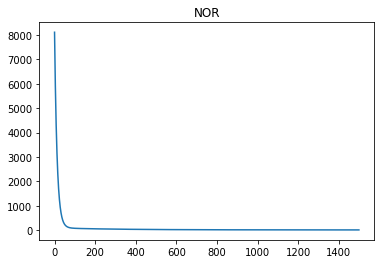

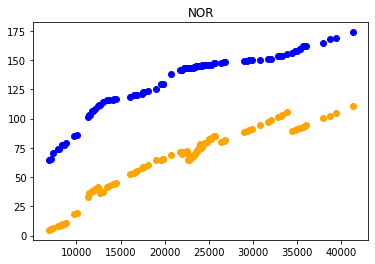

2 USA


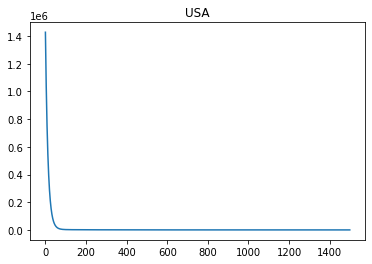

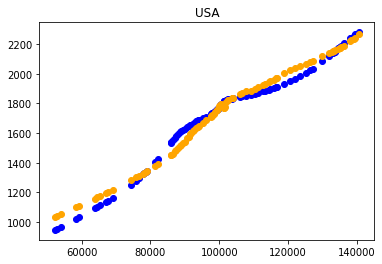

3 CAN


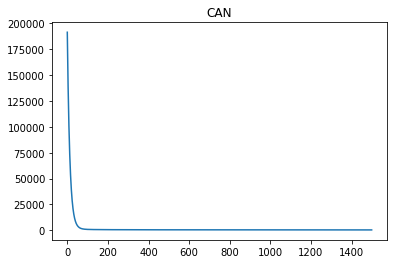

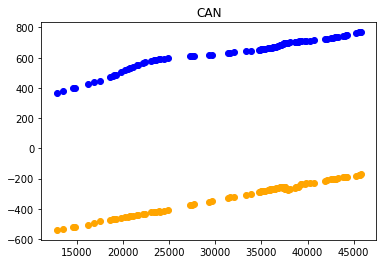

4 LVA


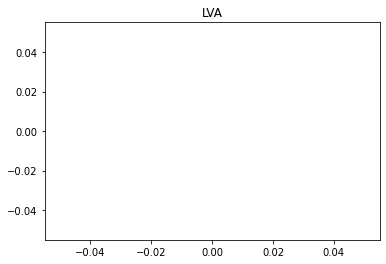

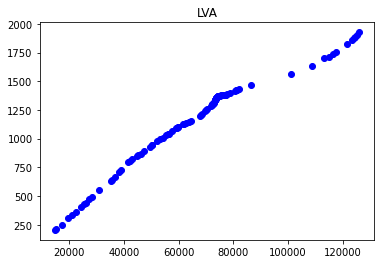

5 DNK


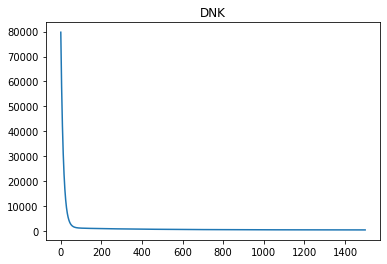

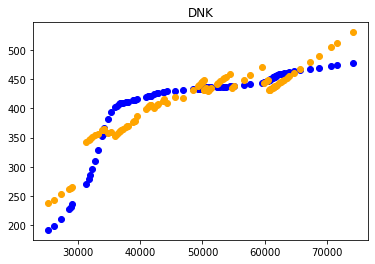

6 ISR


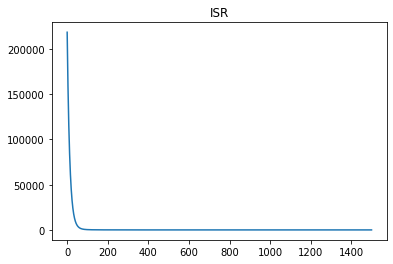

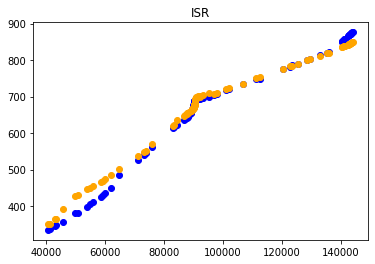

7 CHE


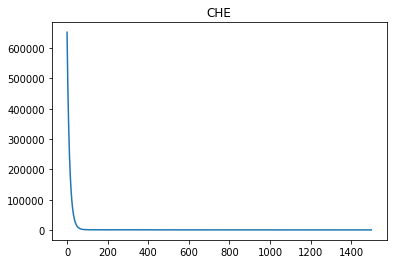

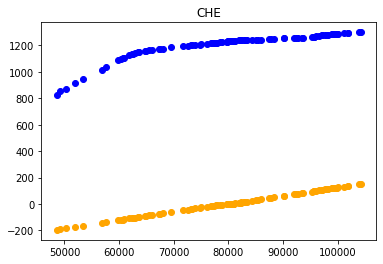

8 CHL


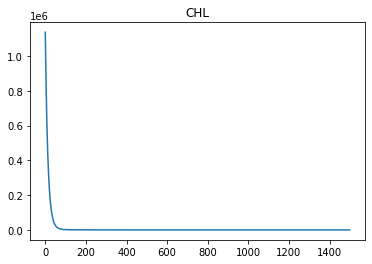

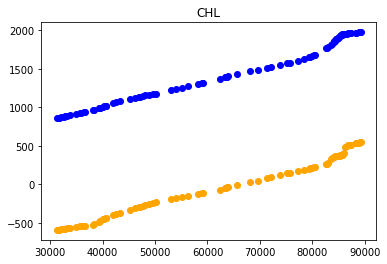

9 FRA


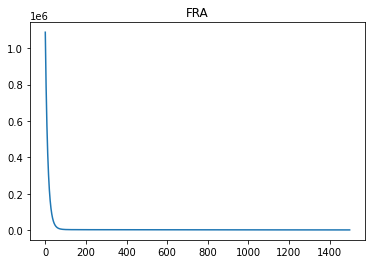

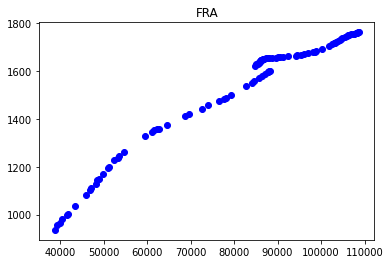

10 AUT


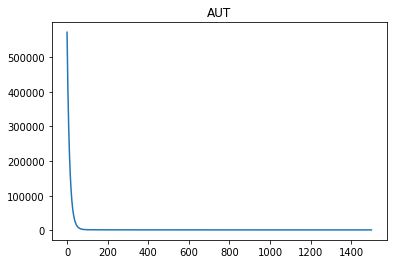

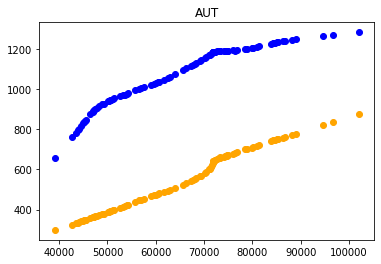

11 CZE


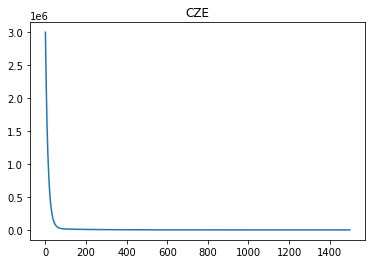

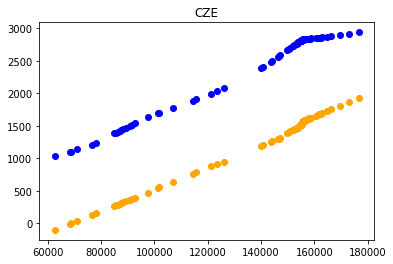

12 BEL


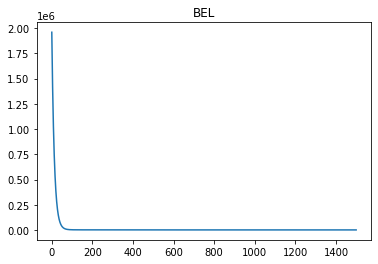

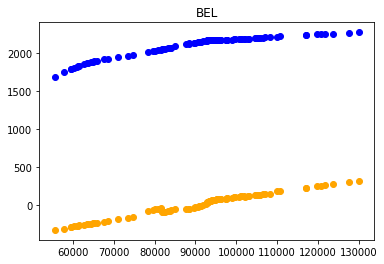

13 IRL


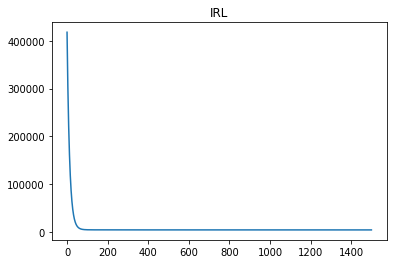

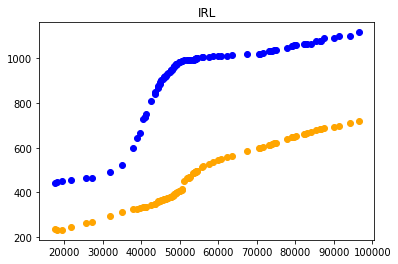

14 SVN


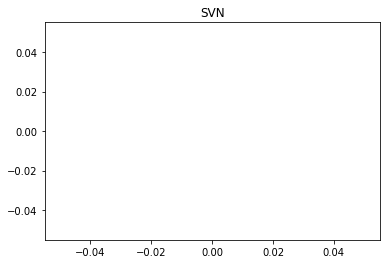

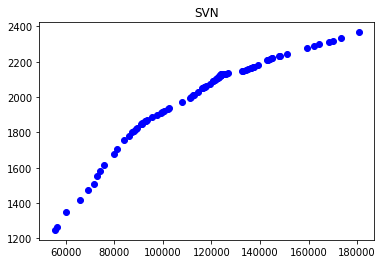

15 ITA


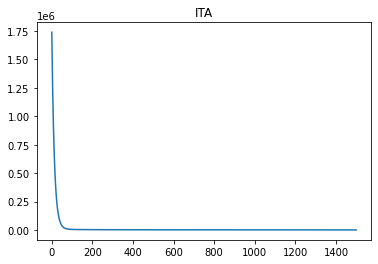

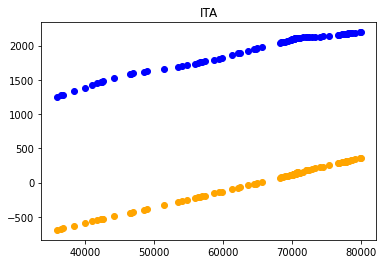

16 EST


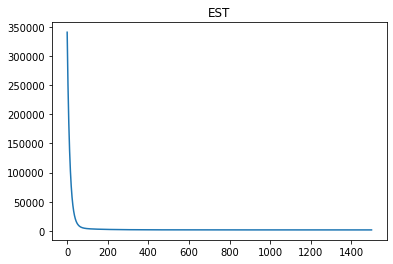

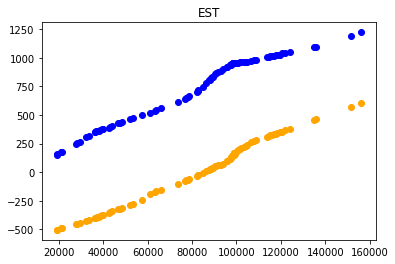

17 BHR


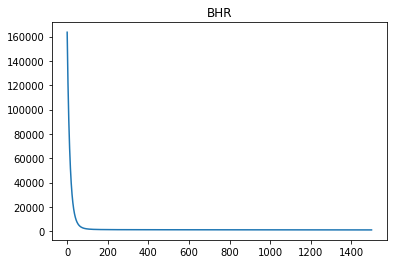

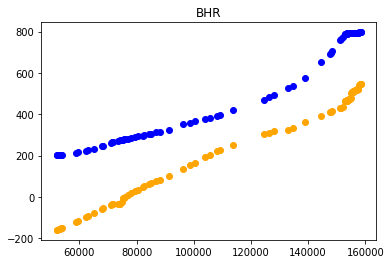

18 DEU


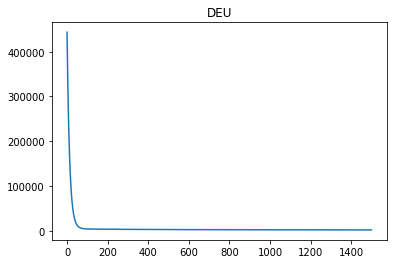

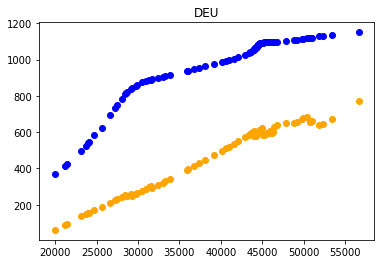

19 LTU


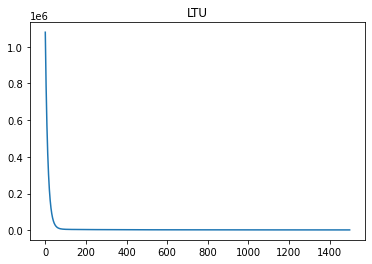

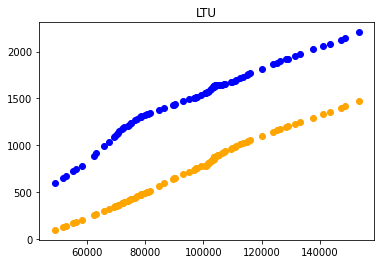

20 SVK


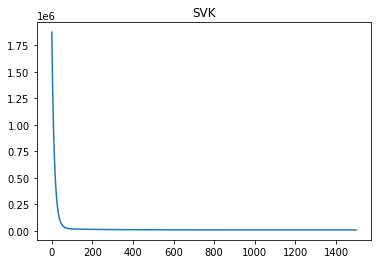

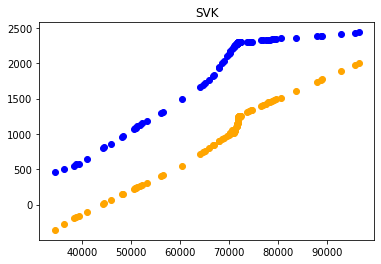

21 GBR


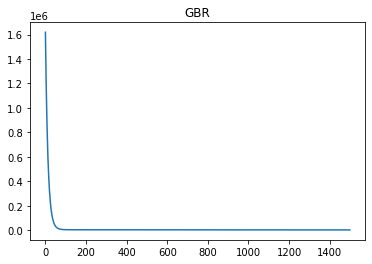

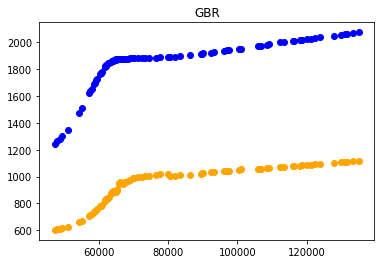

22 GRC


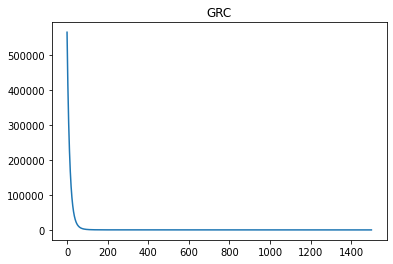

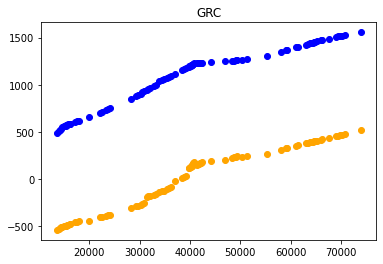

23 IND


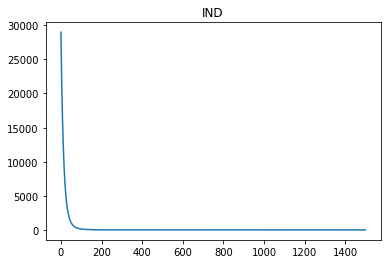

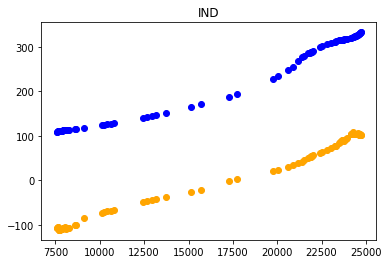

24 MLT


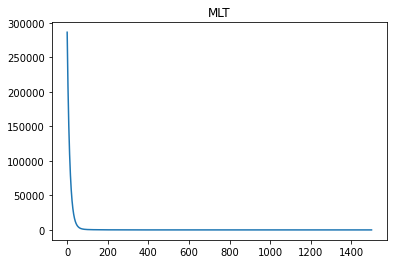

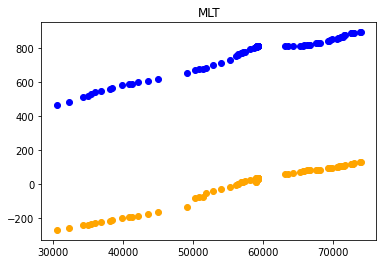

25 ARG


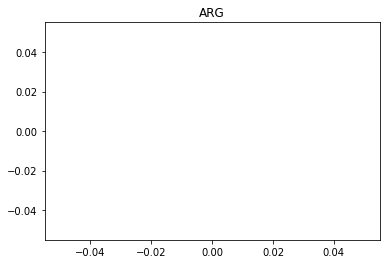

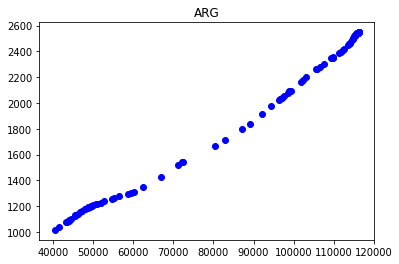

26 MEX


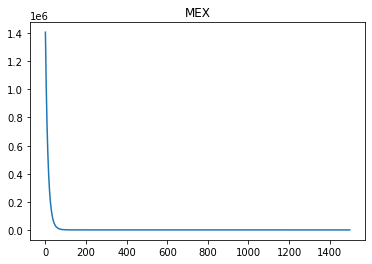

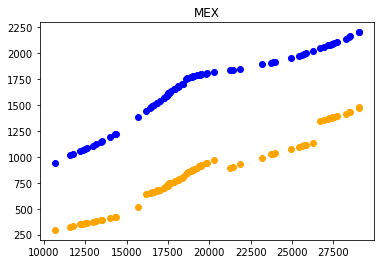

27 LUX


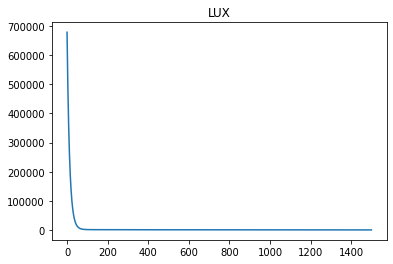

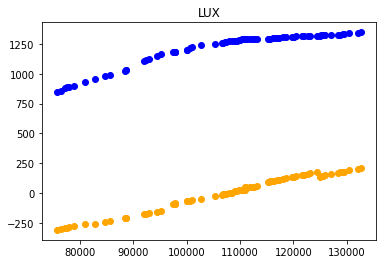

28 ECU


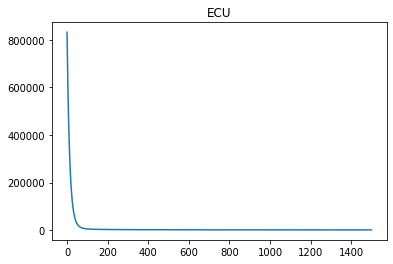

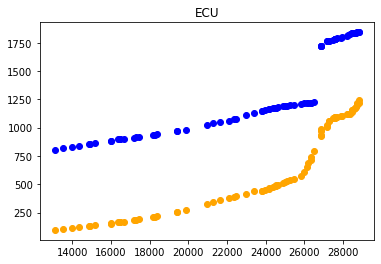

29 TUR


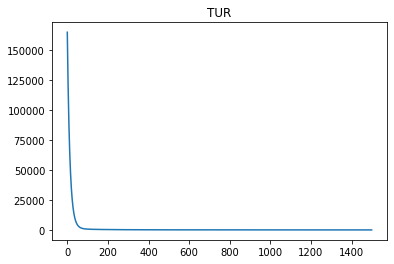

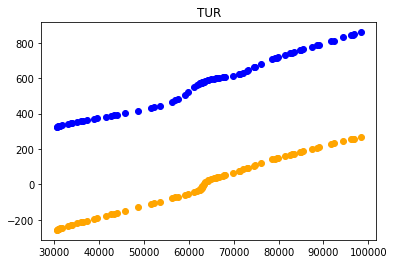

30 KHM


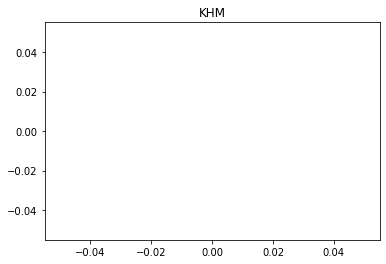

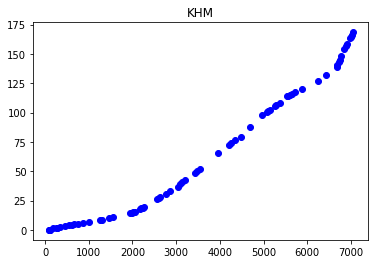

31 PER


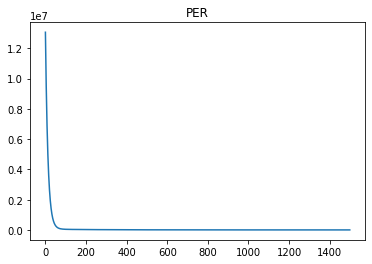

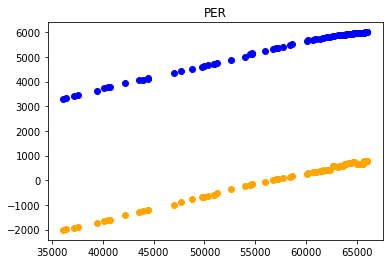

32 ROU


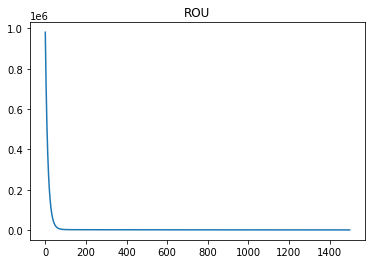

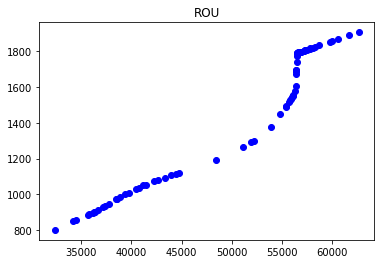

33 NZL


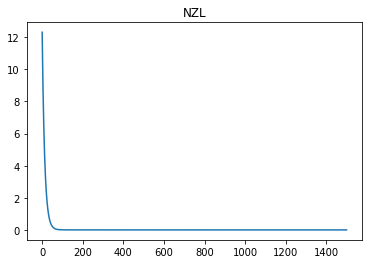

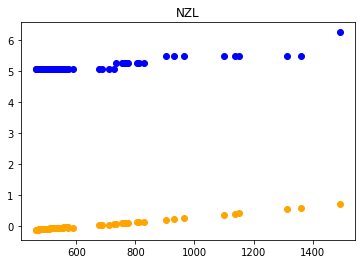

34 KOR


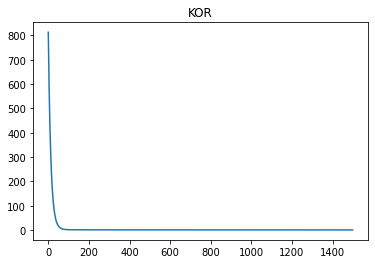

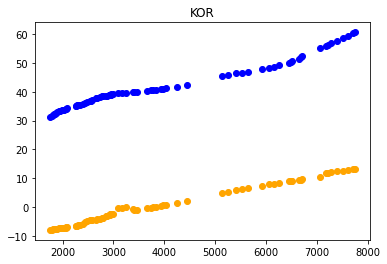

35 AUS


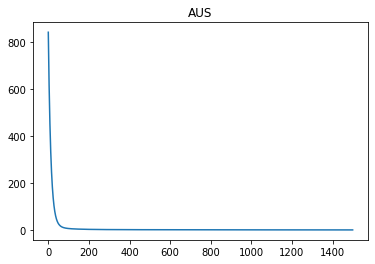

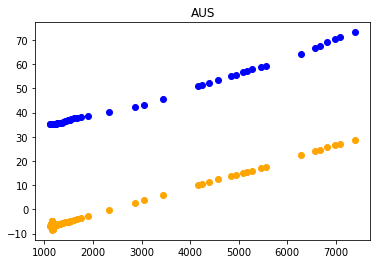

36 POL


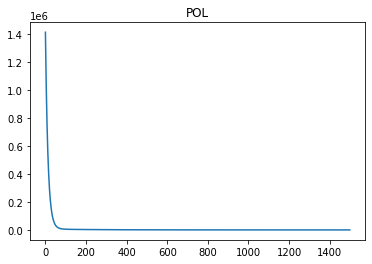

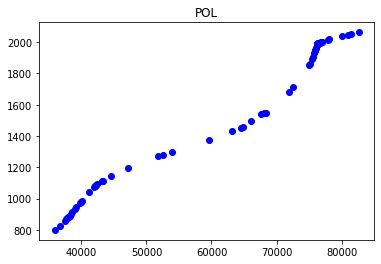

37 IDN


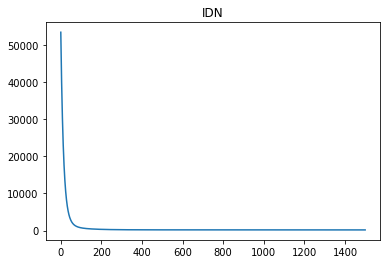

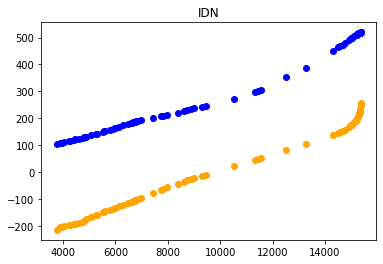

38 UKR


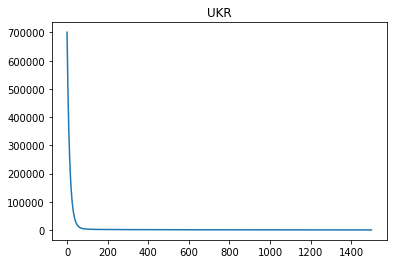

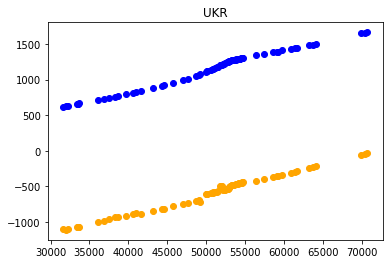

39 PRT


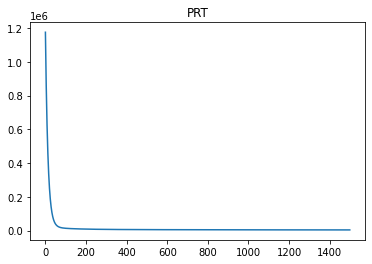

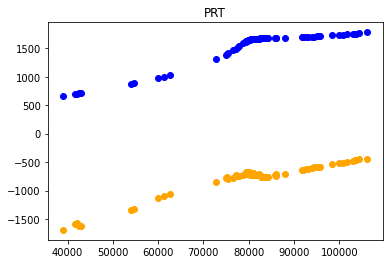

40 URY


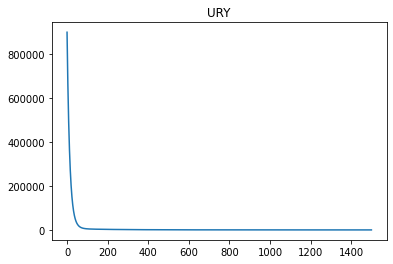

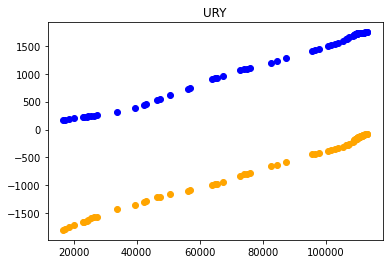

41 MYS


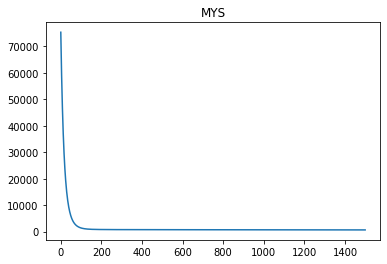

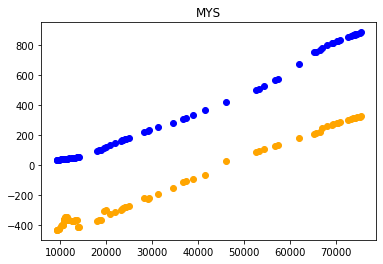

42 BRB


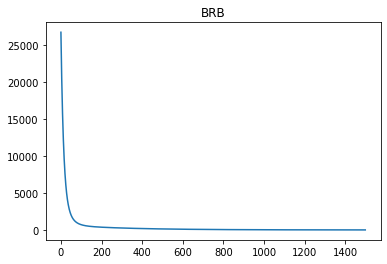

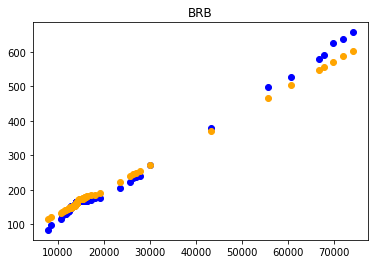

43 FIN


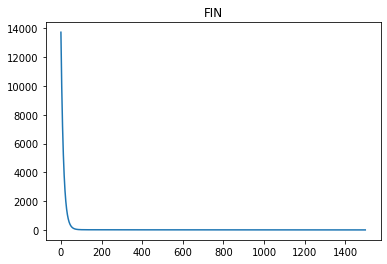

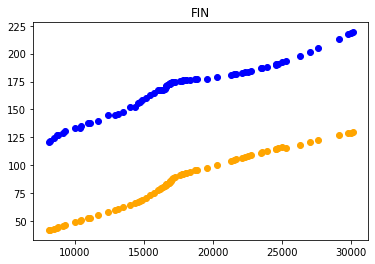

44 LKA


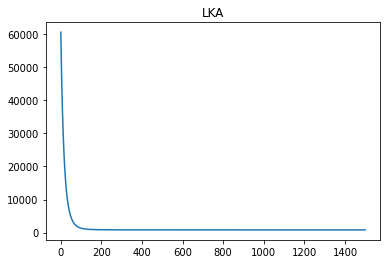

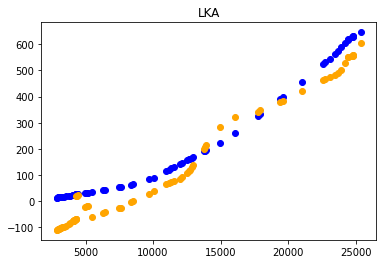

45 BRA


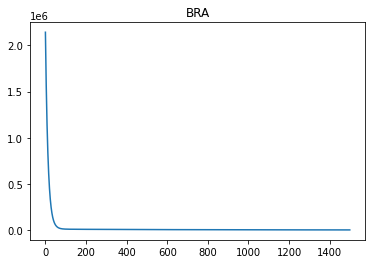

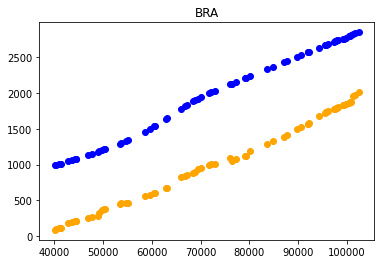

46 GTM


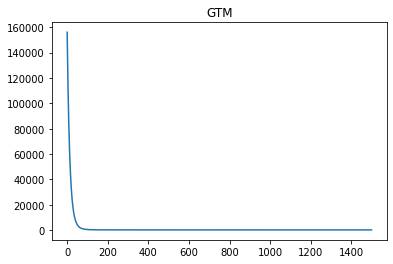

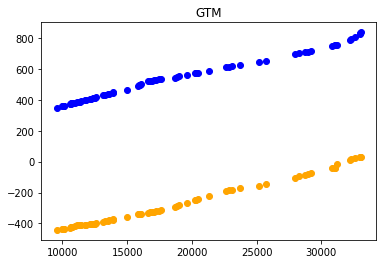

47 ZWE


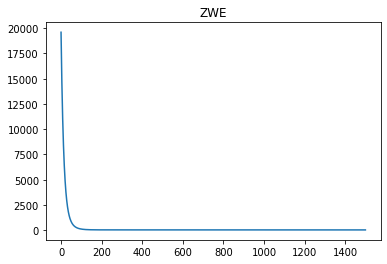

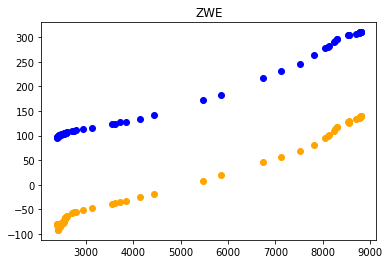

48 HRV


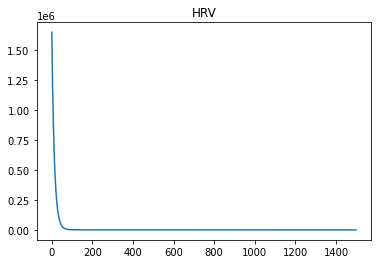

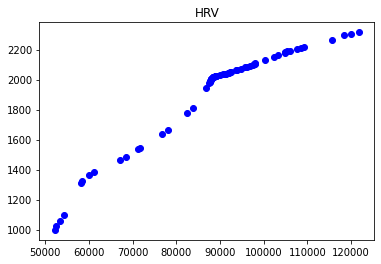

49 HUN


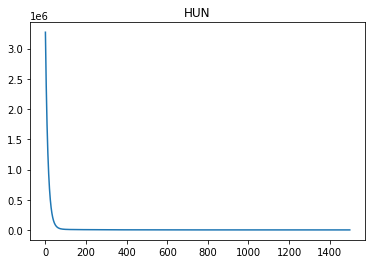

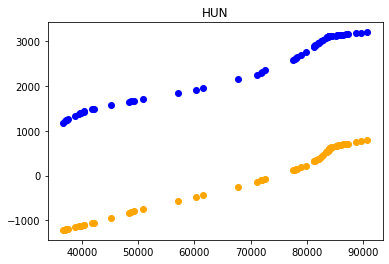

50 RUS


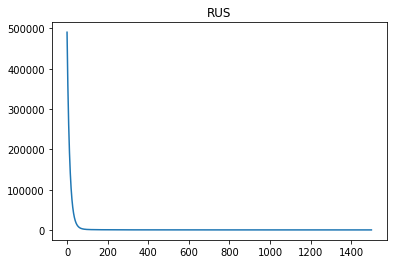

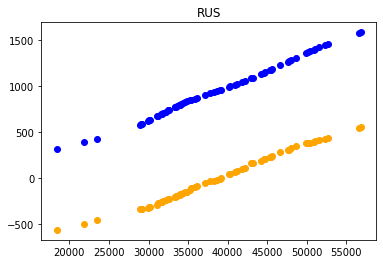

51 LBN


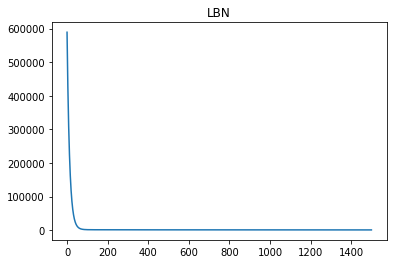

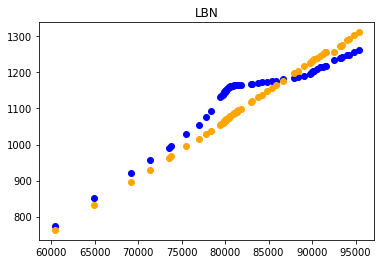

52 PAN


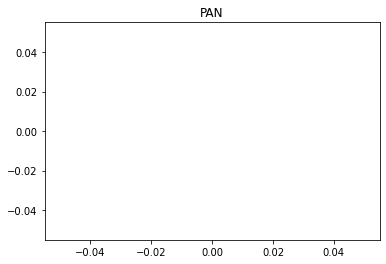

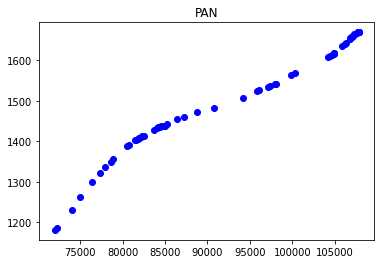

53 VNM


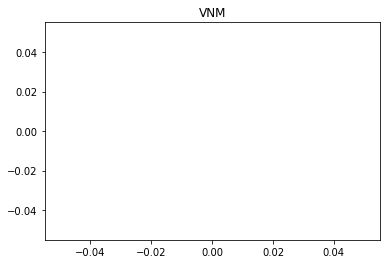

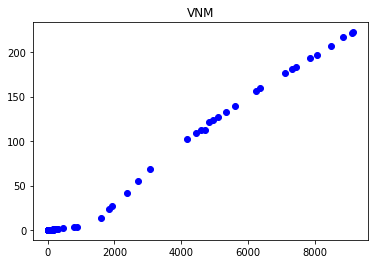

54 ESP


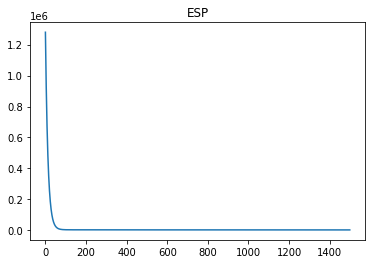

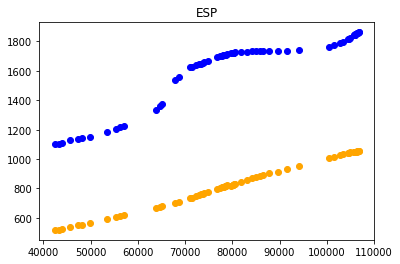

55 JPN


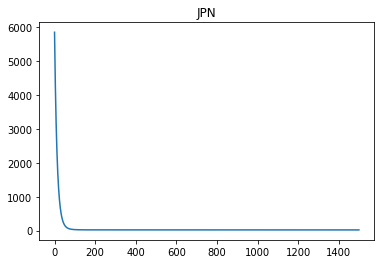

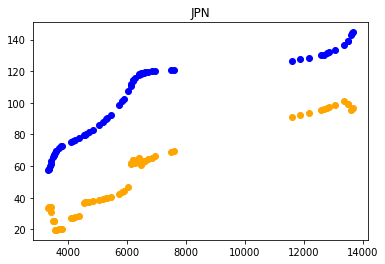

56 DOM


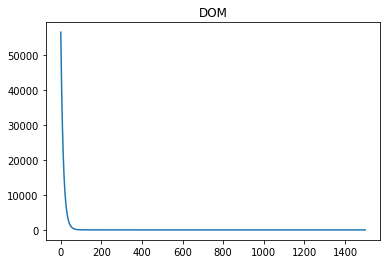

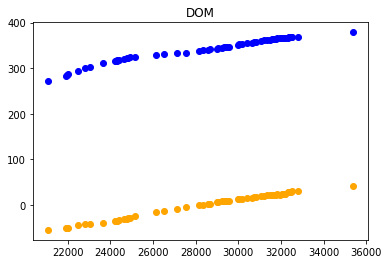

57 BGR


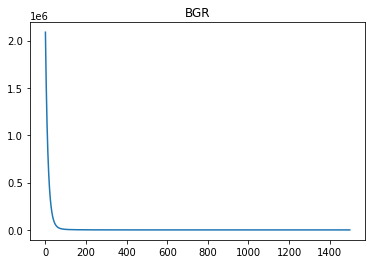

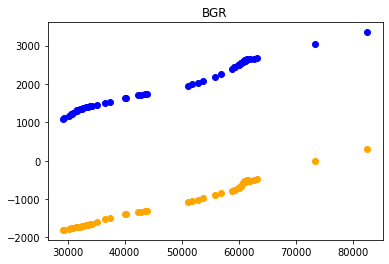

58 THA


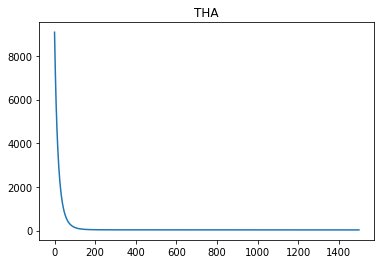

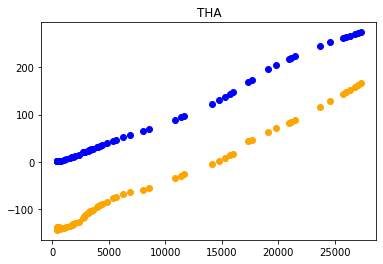

59 AZE


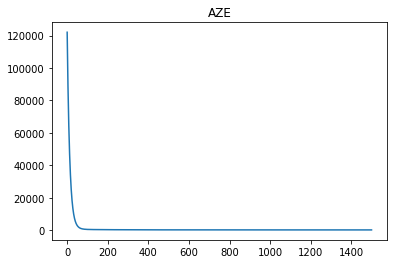

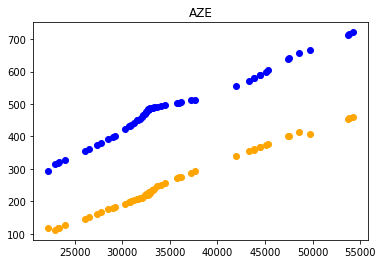

60 MNG


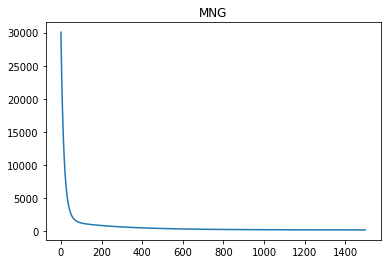

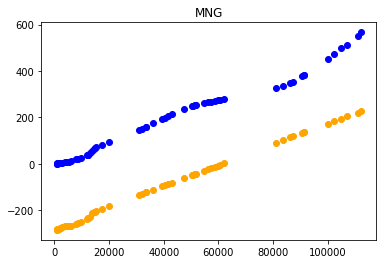

61 TUN


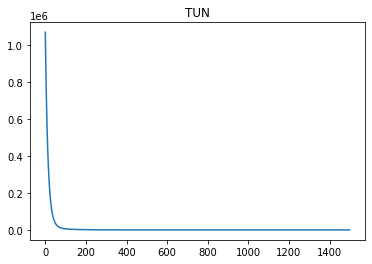

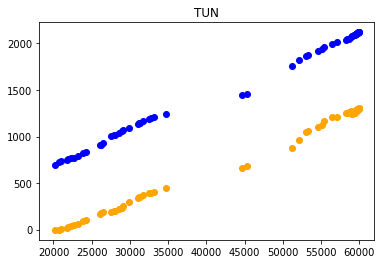

62 TTO


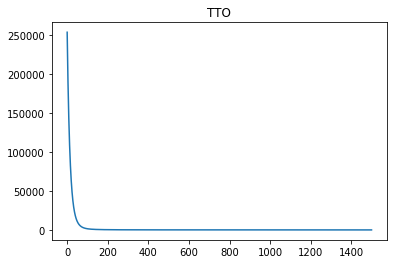

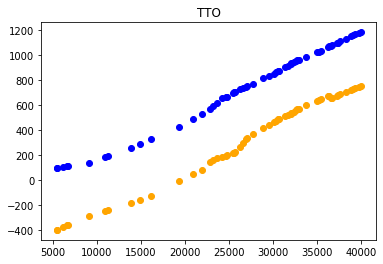

63 PRY


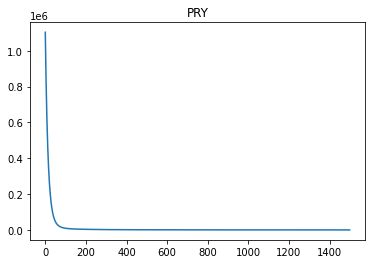

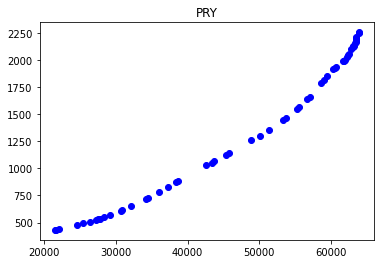

64 KAZ


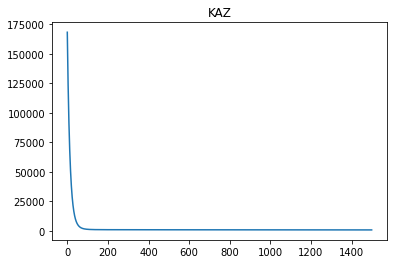

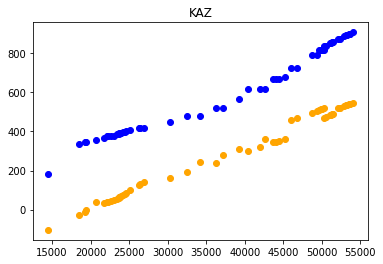

65 BGD


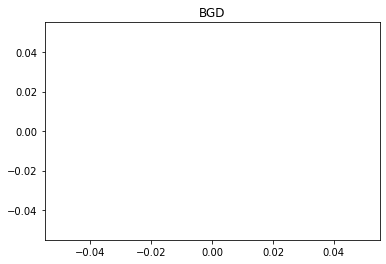

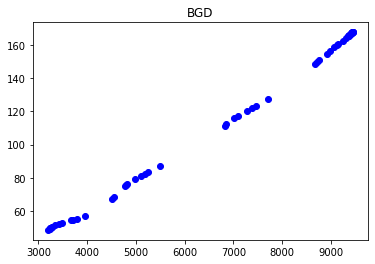

66 SUR


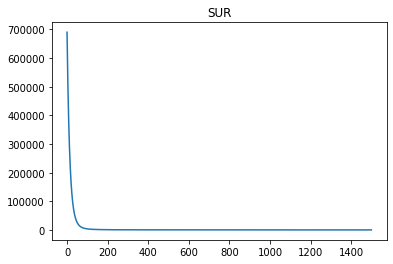

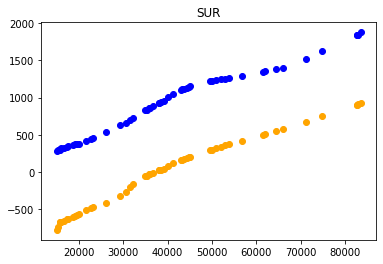

67 COL


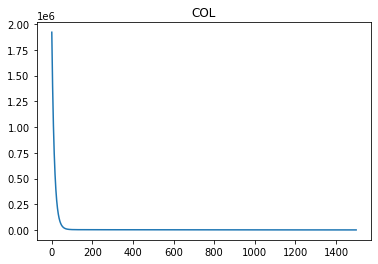

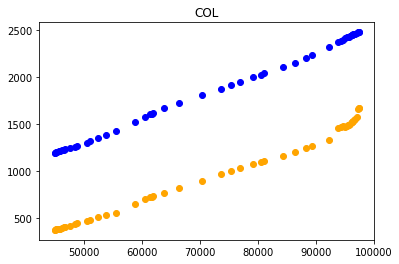

68 ZAF


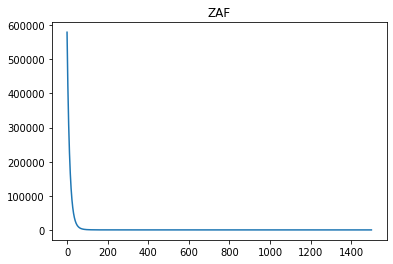

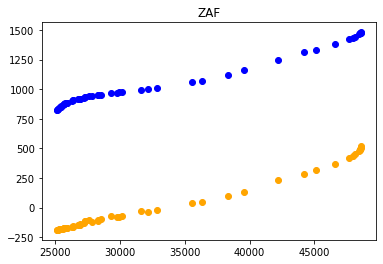

69 MAR


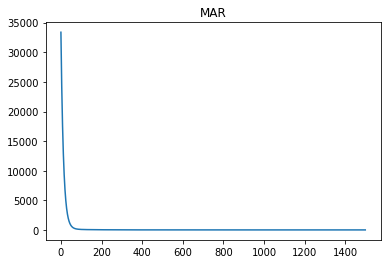

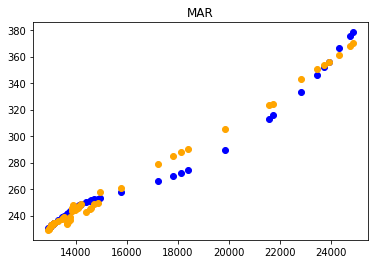

70 ETH


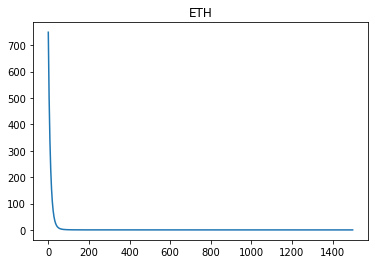

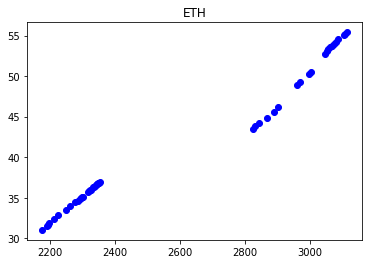

71 BOL


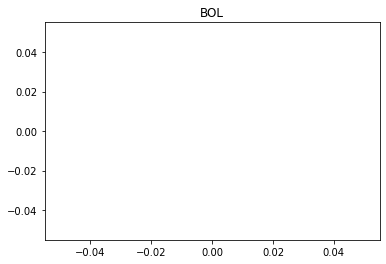

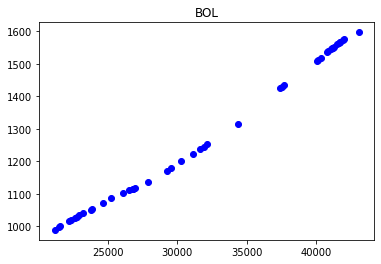

72 MWI


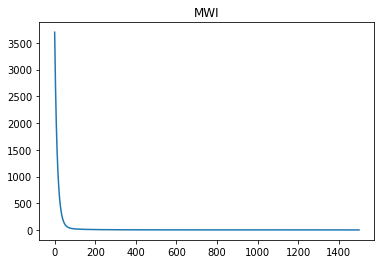

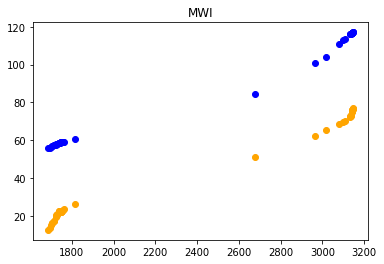

73 KEN


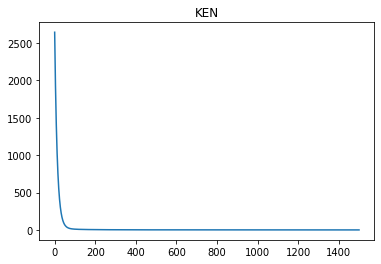

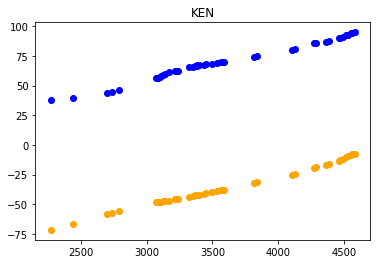

74 ALB


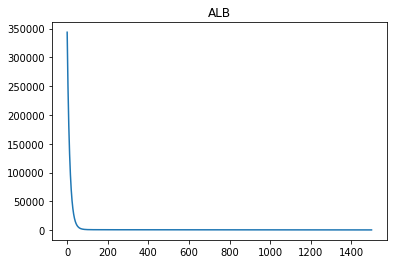

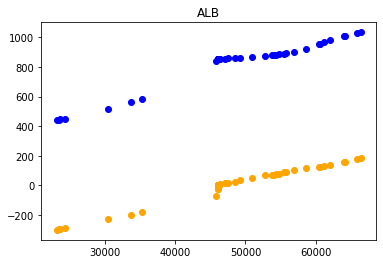

75 JOR


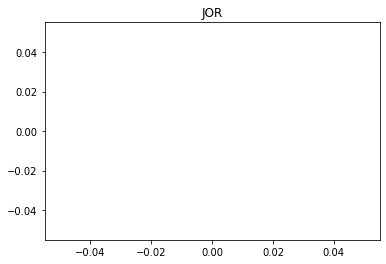

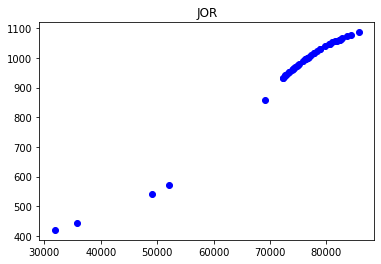

76 NPL


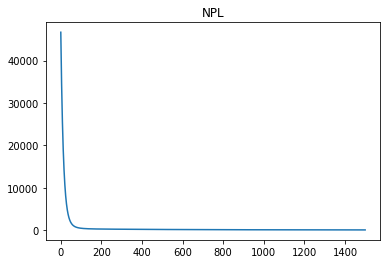

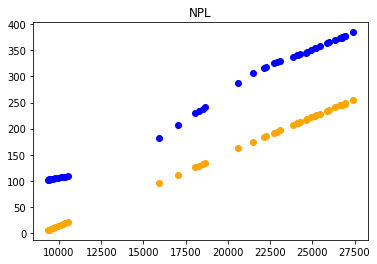

77 GEO


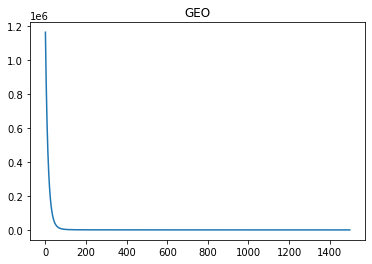

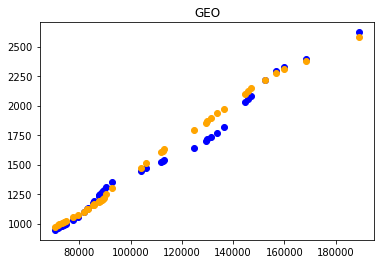

78 BRN


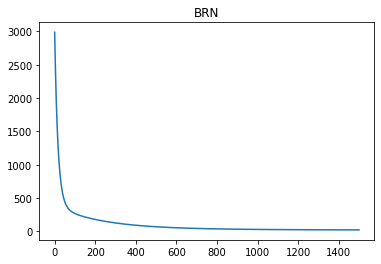

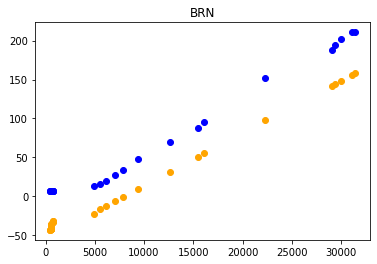

79 QAT


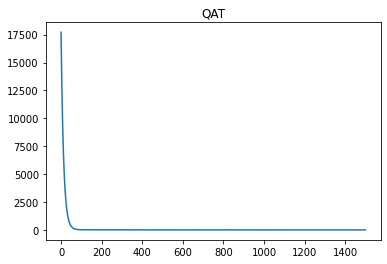

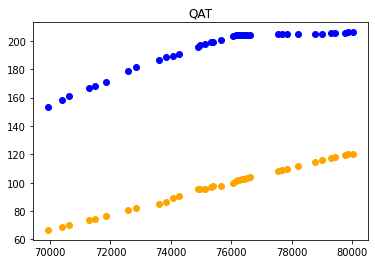

80 SLV


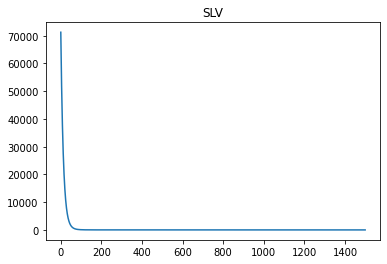

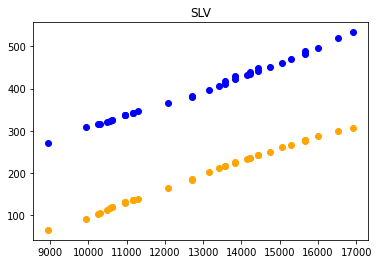

81 CYP


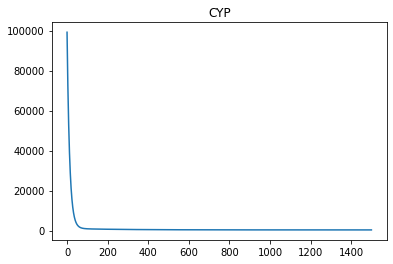

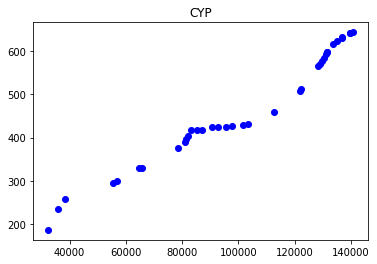

82 SGP


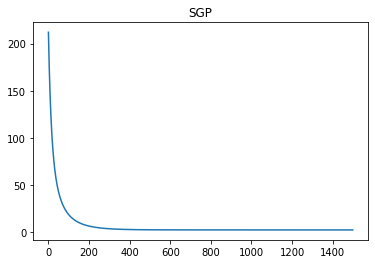

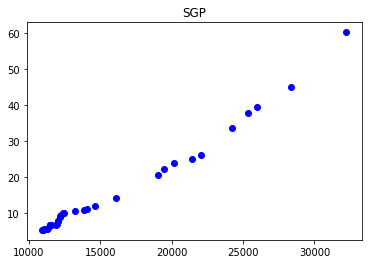

83 SAU


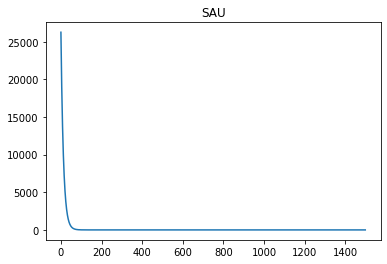

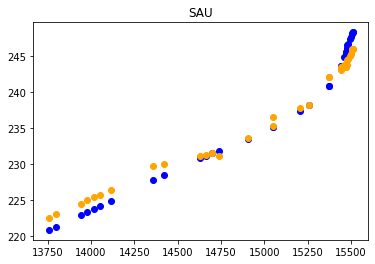

84 GIN


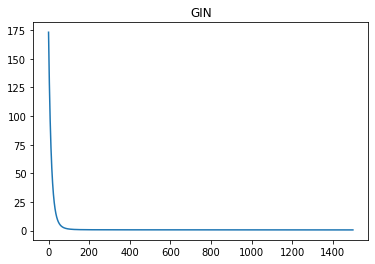

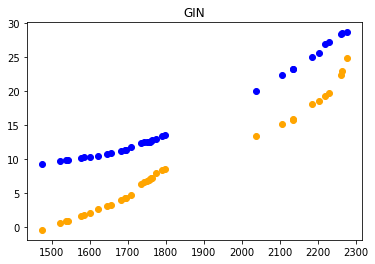

85 MDA


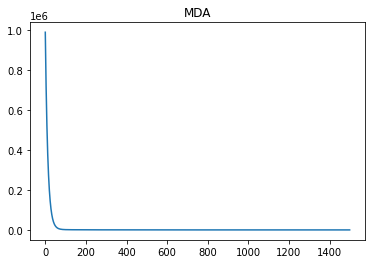

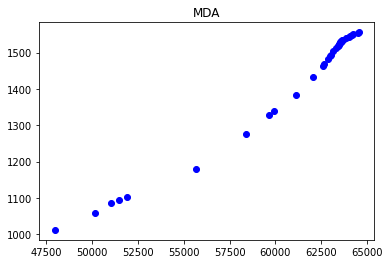

86 KGZ


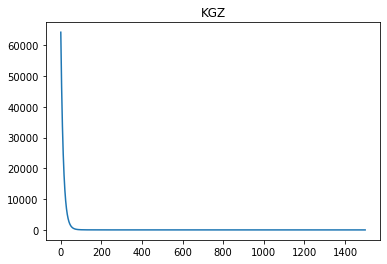

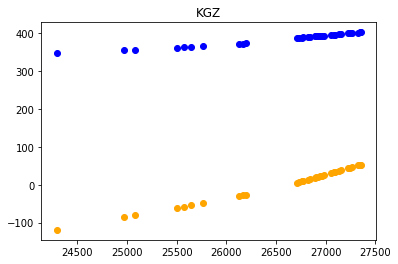

87 ISL


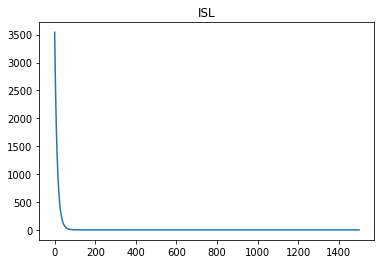

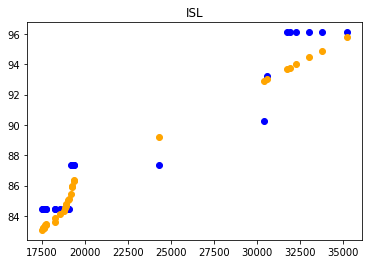

88 ARE


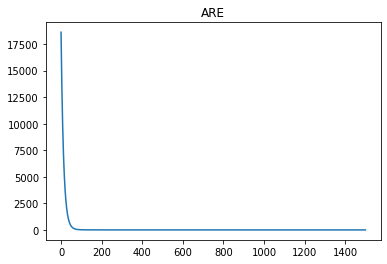

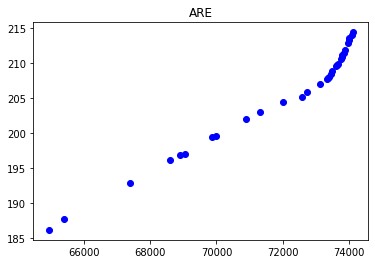

89 BLZ


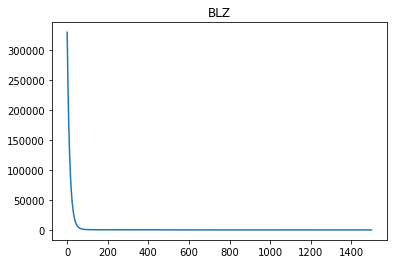

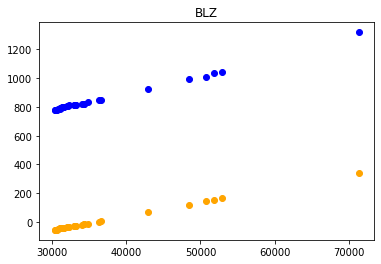

90 PAK


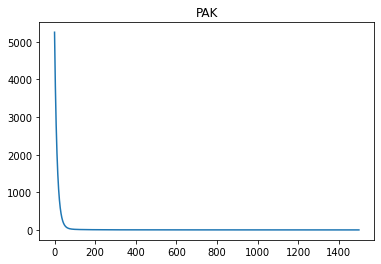

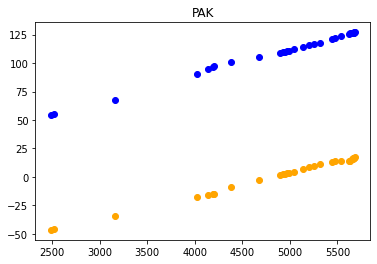

91 PHL


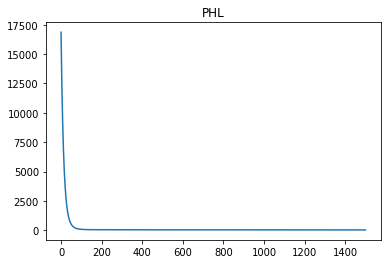

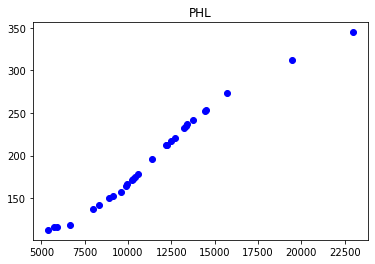

92 ZMB


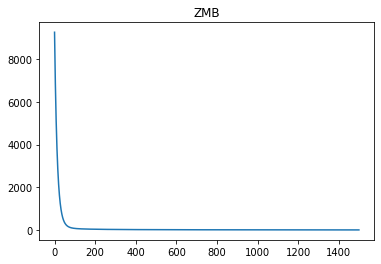

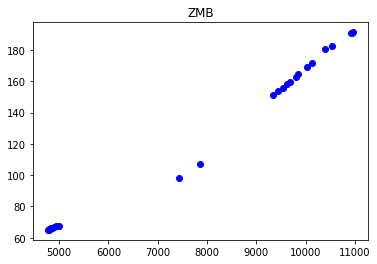

93 BTN


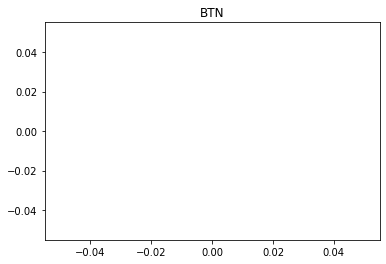

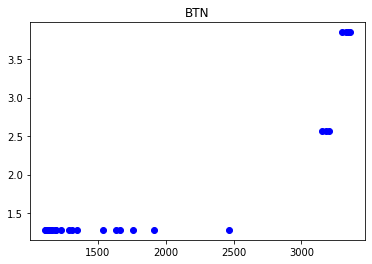

94 LAO


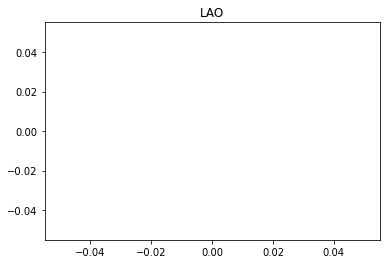

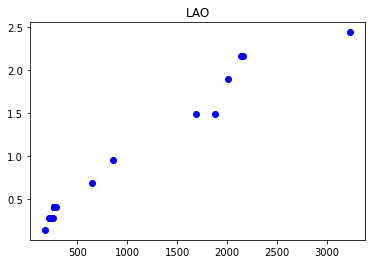

95 OMN


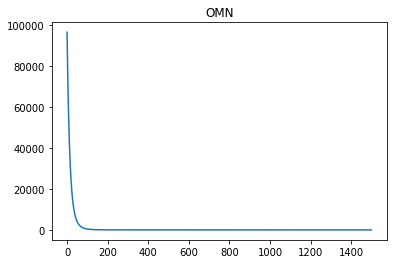

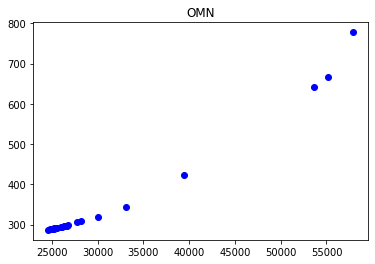

96 JAM


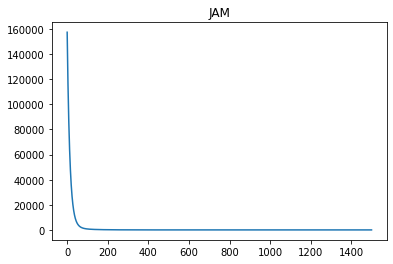

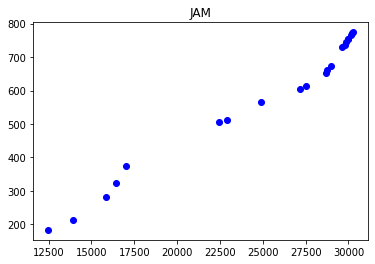

97 UZB


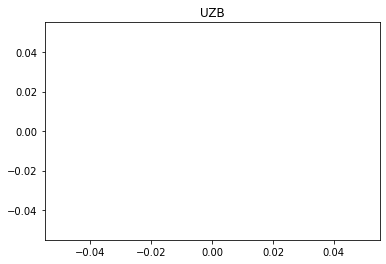

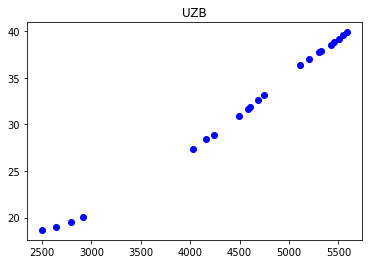

98 SYC


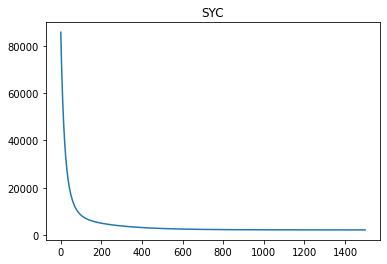

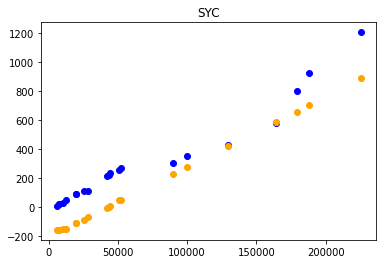

99 UGA


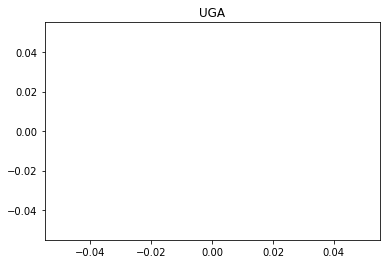

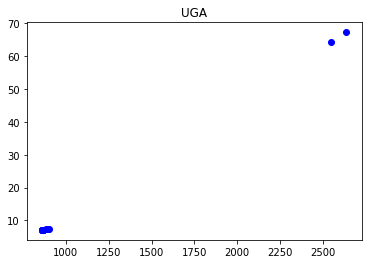

100 GUY


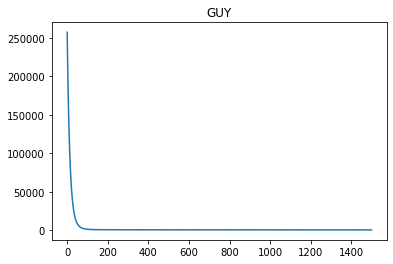

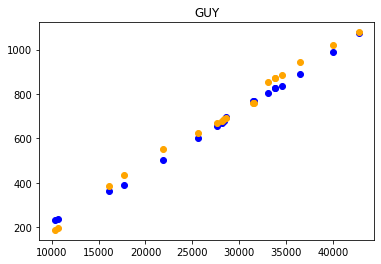

In [ ]:
# countries - obtained from the excel. filtered out countries w/o vaccination, icu
countries = ['NOR', 'USA', 'CAN', 'LVA', 'DNK', 'ISR', 'CHE', 'CHL', 'FRA', 'AUT', 'CZE', 'BEL', 'IRL', 'SVN', 'ITA', 'EST', 'BHR', 'DEU', 'LTU', 'SVK', 'GBR', 'GRC', 'IND', 'MLT', 'ARG', 'MEX', 'LUX', 'ECU', 'TUR', 'KHM', 'PER', 'ROU', 'NZL', 'KOR', 'AUS', 'POL', 'IDN', 'UKR', 'PRT', 'URY', 'MYS', 'BRB', 'FIN', 'LKA', 'BRA', 'GTM', 'ZWE', 'HRV', 'HUN', 'RUS', 'LBN', 'PAN', 'VNM', 'ESP', 'JPN', 'DOM', 'BGR', 'THA', 'AZE', 'MNG', 'TUN', 'TTO', 'PRY', 'KAZ', 'BGD', 'SUR', 'COL', 'ZAF', 'MAR', 'ETH', 'BOL', 'MWI', 'KEN', 'ALB', 'JOR', 'NPL', 'GEO', 'BRN', 'QAT', 'SLV', 'CYP', 'SGP', 'SAU', 'GIN', 'MDA', 'KGZ', 'ISL', 'ARE', 'BLZ', 'PAK', 'PHL', 'ZMB', 'BTN', 'LAO', 'OMN', 'JAM', 'UZB', 'SYC', 'UGA', 'GUY']

# obtaining a new df which only contains those countries above
df_new = df_copy[df_copy['iso_code'].isin(countries)]

# run model on country-by-country-basis
i = 0
for country in countries:
  i += 1
  print(i, country)
  df_features, df_target = get_features_targets(df_new[df_new['iso_code'] == country].dropna(axis=0), x_cols, y_cols)

  # interpolation is done to eliminate the nan values
  # df_features, df_target = get_features_targets(df_new[df_new['iso_code'] == country].interpolate(method='linear', axis=0, limit_direction='both'), x_cols, y_cols)
  
  # multiple_linear_regression function returns the coefficients of linear regression
  beta = multiple_linear_regression(df_features, df_target, country)
  final_beta = beta[-1]

# Accuracy Metrics

# Task 2

Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.
* Find an interesting problem which you want to solve either using Linear Regression or Classification (please check with your instructors first on whether the problem makes sense).
* Find a dataset to build your model. For example, you can use Kaggle
(https://www.kaggle.com/datasets) to find suitable datasets.
* Use plots to visualize and understand your data.
* Create training and test data sets.
* Build your model.
* Choose an appropriate metric to evaluate your model (you may use the same metric as the one used in Task 1).
* Improve your model.

Dataset Source: **insert link here**

Predictor Variables Chosen:
1.   List item
2.   List item

## Interesting Article: https://vibgyorpublishers.org/content/ijior/ijior-3-008.php?jid=ijior

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [ ]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

Cloning into 't3-2d-ddw'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 53 (delta 24), reused 39 (delta 15), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [ ]:
# Import dataset
file_url = 't3-2d-ddw/task-2/merged/combined.csv'
df_task_2 = pd.read_csv(file_url)
df_task_2.reset_index(drop=True, inplace=True)

# df_task_2["total_cases"] = df["total_cases"]
# df.dropna()

# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes 

In [ ]:
countries_list = df_task_2['Code'].unique()
countries_list

array(['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
       'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GUM', 'GTM', 'GUY', 'HTI',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
       'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
       'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
       'ZWE'], dtype=object)

In [ ]:
df_task_2.to_csv("df_task_2.csv")

In [8]:
countries = ['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
       'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GUM', 'GTM', 'GUY', 'HTI',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
       'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
       'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
       'ZWE']

In [21]:
df_cases = df.loc[df['iso_code'].isin(countries)]

In [71]:
# Import dataset
file_url = 't3-2d-ddw/task-2/merged/combined.csv'
df_task_2 = pd.read_csv(file_url)

df_task_2['total_cases_per_million'] = df_cases['total_cases_per_million']
df_task_2.to_csv("combined-w-cases.csv")
df_task_2.dropna().to_csv("combined-w-cases-no-na.csv")
df_task_2.interpolate(method='linear', axis=0, limit_direction='both').to_csv("combined-w-cases-interpolate.csv")

In [ ]:
# # Import dataset
# file_url = 't3-2d-ddw/task-2/merged/combined-w-cases-no-na.csv'
# df_task_2 = pd.read_csv(file_url)

# df_task_2['total_cases_per_million'] = df_cases['total_cases_per_million']
# df_task_2.to_csv("combined-w-cases.csv")
# df_task_2.dropna().to_csv("combined-w-cases-no-na.csv")
# df_task_2.interpolate(method='linear', axis=0, limit_direction='both').to_csv("combined-w-cases-interpolate.csv")

## Pre-Process Data

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

In [42]:
def normalize_z(df):
  '''
  normalise z - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  # dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def get_features_targets(df, feature_names, target_names):
  '''
  get a pandas.DataFrame corresponding to the features and targets respectively
  :param df: pandas.DataFrame, full dataset
  :param feature_names: list, names of columns to be used as features
  :param target_names: list, names of columns to be used as targets
  return pandas.DataFrame, pandas.DataFrame
  '''
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector, 
  and add a column of '1's in the first column
  :param df_feature: pandas.DataFrame, values of features
  return numpy.array
  '''
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector
  :param df_feature: pandas.DataFrame, values of targets
  return numpy.array
  '''
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    res = np.sum((y - ypred) ** 2)
    ymean = np.mean(y)
    tot = np.sum((y - ymean) ** 2)
    r2 = 1- res/tot
    print(r2)
    return r2

def mean_squared_error(target, pred):
    ysum = np.sum((target - pred) ** 2)
    n = target.shape[0]
    return ysum/n

Predictor Variables (X)

Variable (X) | Description | Category
-------------------|------------------ | ------------------


Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
total_cases_per_million   | Total confirmed cases of COVID-19 per 1,000,000 people | Confirmed cases

In [73]:
# Extract features and targets
x_cols = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings', 'stay_home_requirements']
y_cols = ['total_cases_per_million']
df_task_2_na = df_task_2.copy()
df_task_2_na.dropna(inplace=True)
df_task_2_ip = df_task_2.copy()
df_task_2_ip.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

df_features_na, df_target_na = get_features_targets(df_task_2_na, x_cols, y_cols)
df_features_ip, df_target_ip = get_features_targets(df_task_2_ip, x_cols, y_cols)

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


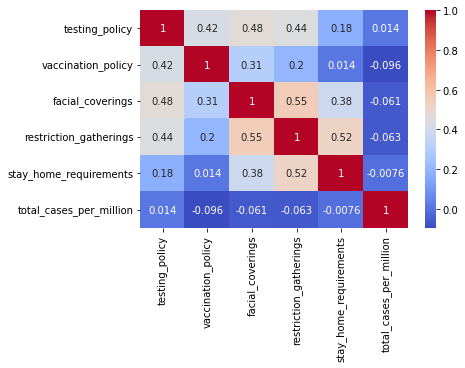

,total_cases_per_million
testing_policy,0.013655
vaccination_policy,-0.095637
facial_coverings,-0.060861
restriction_gatherings,-0.063030
stay_home_requirements,-0.007591
total_cases_per_million,1.000000


In [94]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2.corr()
pd.set_option('display.max_rows', None)
cases_corr = pd.DataFrame(corrMatrix['total_cases_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr

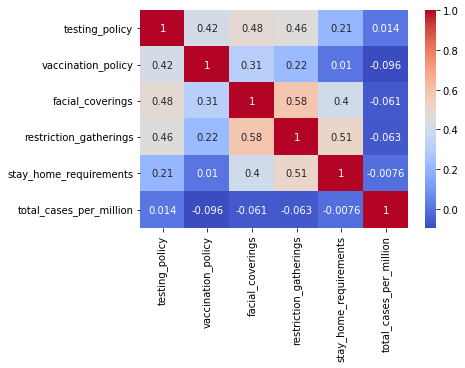

,total_cases_per_million
testing_policy,0.013655
vaccination_policy,-0.095637
facial_coverings,-0.060861
restriction_gatherings,-0.063030
stay_home_requirements,-0.007591
total_cases_per_million,1.000000


In [95]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2_na.corr()
pd.set_option('display.max_rows', None)
cases_corr_na = pd.DataFrame(corrMatrix['total_cases_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_na

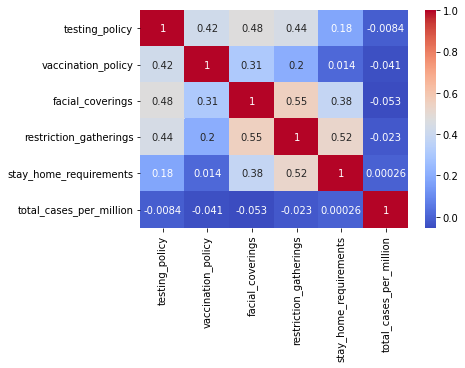

,total_cases_per_million
testing_policy,-0.008442
vaccination_policy,-0.041028
facial_coverings,-0.053130
restriction_gatherings,-0.022685
stay_home_requirements,0.000261
total_cases_per_million,1.000000


In [96]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2_ip.corr()
pd.set_option('display.max_rows', None)
cases_corr_ip = pd.DataFrame(corrMatrix['total_cases_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_ip

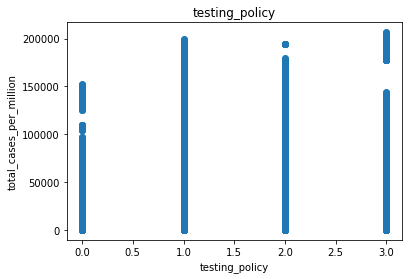

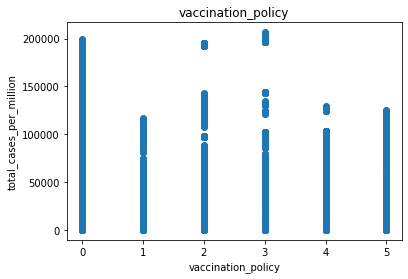

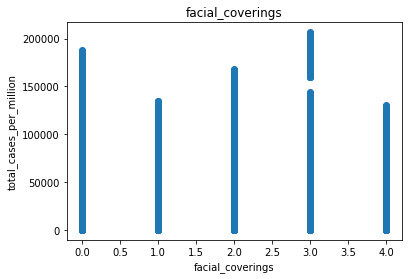

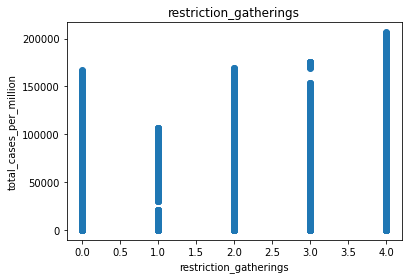

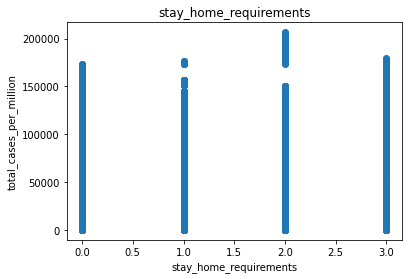

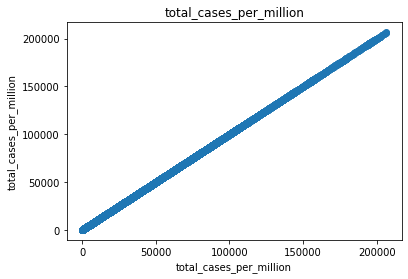

In [97]:
# Plot predictor variables against total cases
for row in cases_corr.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2[col_name], df_task_2["total_cases_per_million"])
  plt.show()

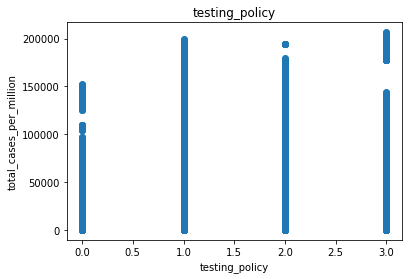

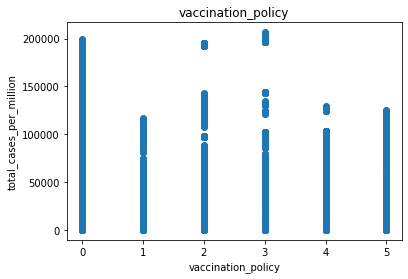

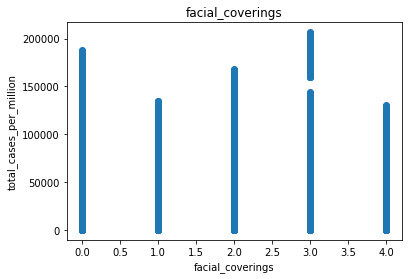

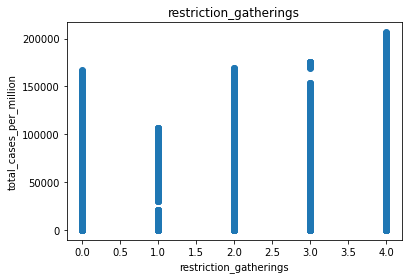

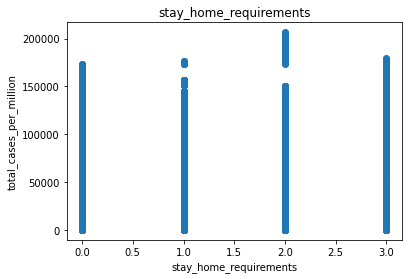

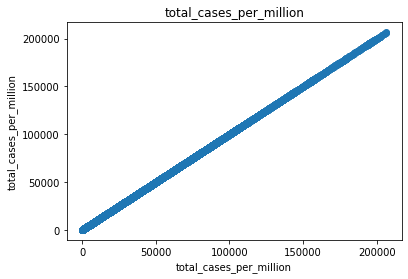

In [98]:
# Plot predictor variables against total cases
for row in cases_corr_na.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_na[col_name], df_task_2_na["total_cases_per_million"])
  plt.show()

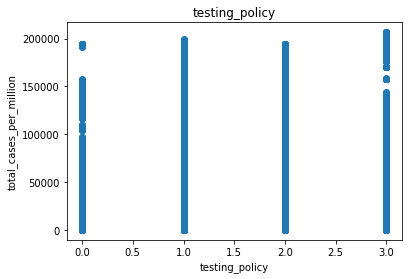

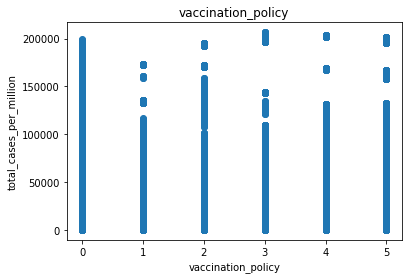

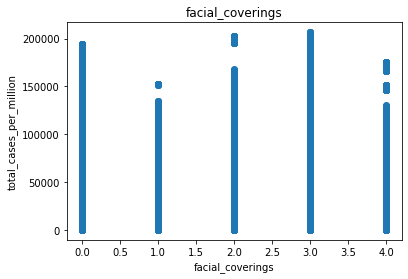

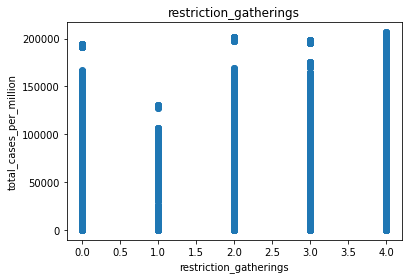

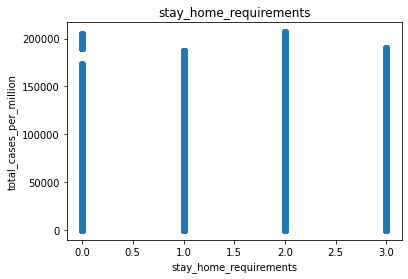

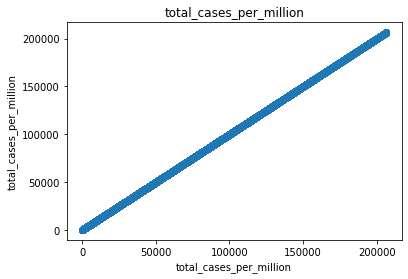

In [99]:
# Plot predictor variables against total cases
for row in cases_corr_ip.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_ip[col_name], df_task_2_ip["total_cases_per_million"])
  plt.show()

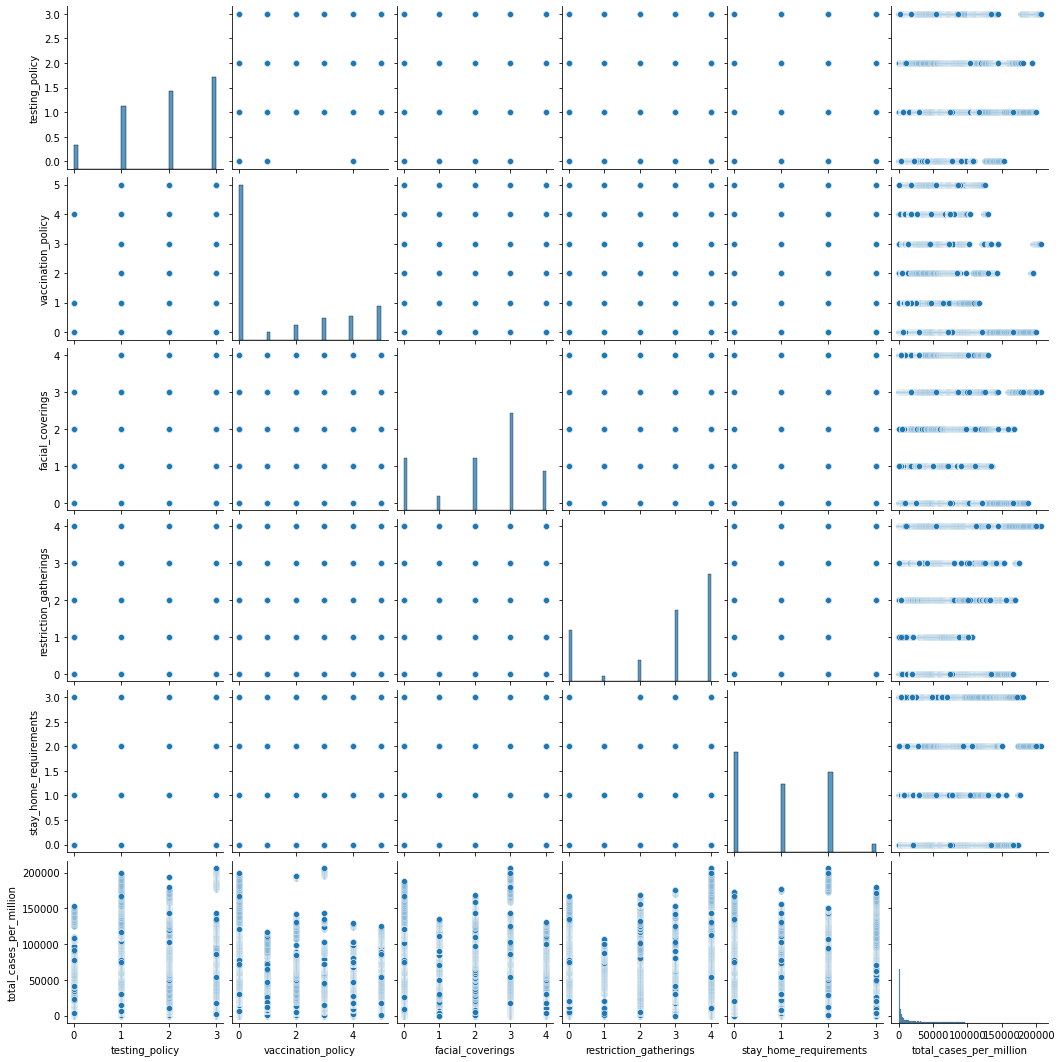

In [100]:
sns.pairplot(data=df_task_2)

## Multiple Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [101]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [108]:
def multiple_linear_regression(df_features, df_target):
  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=None, test_size=0.3)

  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  alpha = 0.01
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.plot(J_storage)
  plt.figure()
  plt.scatter(df_features_test["testing_policy"], np.array(df_target_test), color='blue')
  plt.scatter(df_features_test["testing_policy"], pred, color='orange')
  plt.show()

  # Calculate r^2
  # change target test set to a numpy array
  target = df_target_test.to_numpy()
  # Calculate r2 score by calling a function
  r2 = r2_score(target, pred)
  print("r2: ", r2)

  # Calculate MSE
  mse = mean_squared_error(target, pred)
  print("mse: ", mse)

normal


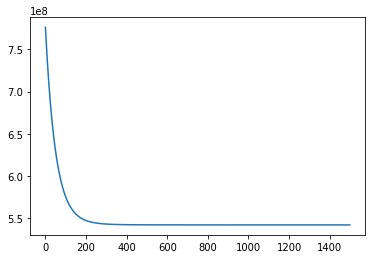

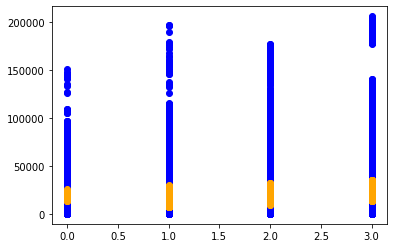

0.020581241379470372
r2:  0.020581241379470372
mse:  1080530748.0746849
drop na


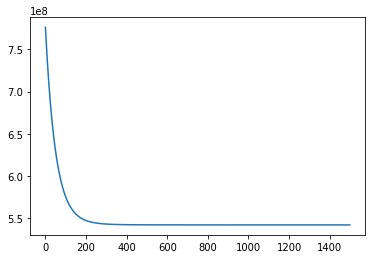

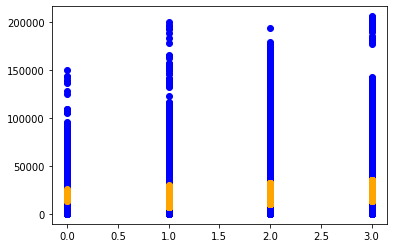

0.017399188181213665
r2:  0.017399188181213665
mse:  1105268343.894751
interpolate


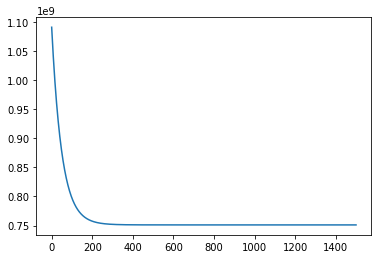

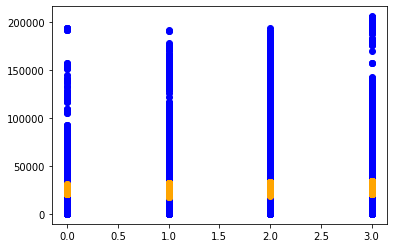

0.005473732958660382
r2:  0.005473732958660382
mse:  1482816969.8445482


In [109]:
print("normal")
multiple_linear_regression(df_features, df_target)

print("drop na")
multiple_linear_regression(df_features_na, df_target_na)

print("interpolate")
multiple_linear_regression(df_features_ip, df_target_ip)

In [114]:
for col in df_task_2:
    print(df_task_2[col].unique())

['Albania' 'Algeria' 'Andorra' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde' 'Chad' 'China'
 'Colombia' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Eritrea' 'Eswatini' 'Ethiopia' 'Faeroe Islands' 'Finland' 'France'
 'Gabon' 'Georgia' 'Germany' 'Greece' 'Greenland' 'Guam' 'Guatemala'
 'Guyana' 'Haiti' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Liberia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Macao' 'Malawi' 'Malaysia' 'Malta' 'Mauritania'
 'Mauritius' 'Mexico' 'Monaco' 'Mongolia' 'Morocco' 'Mozambique'
 'Netherlands' 'Nigeria' 'Norway' 'Papua New Guinea' 'Poland' 'Portugal'
 'Qatar' 'Roma

# Accuracy Metrics

In [105]:
# Calculate r^2
# change target test set to a numpy array
target = df_target_test.to_numpy()
# Calculate r2 score by calling a function
r2 = r2_score(target, pred)
print(r2)

# Calculate MSE
mse = mean_squared_error(target, pred)
print(mse)

NameError: ignored

From: https://towardsdatascience.com/master-machine-learning-multiple-linear-regression-from-scratch-with-python-ac716a9b78a4


In [ ]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate # alpha
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights (beta) and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

# Preprocessing (Can delete later)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [ ]:
df_vac = pd.read_csv("t3-2d-ddw/task-2/covid-vaccination-policy.csv")
df_vac.name = "df_vac"
df_test = pd.read_csv("t3-2d-ddw/task-2/covid-19-testing-policy.csv")
df_test.name = "df_test"
df_face = pd.read_csv("t3-2d-ddw/task-2/face-covering-policies-covid.csv")
df_face.name = "df_face"
df_public = pd.read_csv("t3-2d-ddw/task-2/public-gathering-rules-covid.csv")
df_public.name = "df_public"
df_stay = pd.read_csv("t3-2d-ddw/task-2/stay-at-home-covid.csv")
df_stay.name = "df_stay"

In [ ]:
dataframes = [df_vac, df_test, df_face, df_public, df_stay]

In [ ]:
pd.merge(df_vac, df_test, "outer").to_csv("df_vac_test.csv")
pd.merge(df_test, df_face, "outer").to_csv("df_test_face.csv")
pd.merge(df_face, df_public, "outer").to_csv("df_face_public.csv")
pd.merge(df_public, df_stay, "outer").to_csv("df_public_stay.csv")
pd.merge(df_stay, df_vac, "outer").to_csv("df_stay_vac.csv")

In [ ]:
df_vac_test = pd.merge(df_vac, df_test, "outer")
df_test_face = pd.merge(df_test, df_face, "outer")
df_face_public = pd.merge(df_face, df_public, "outer")
df_public_stay = pd.merge(df_public, df_stay, "outer")
df_stay_vac = pd.merge(df_stay, df_vac, "outer")

In [ ]:
def merge_and_save(dataframes):
  for idx in range(len(dataframes)):
    if idx == 4:
      df_merged = pd.merge(dataframes[idx], dataframes[0], "outer")
      missing_indices = list(np.where(pd.isnull(df_merged))[0])
      filename = "missing_" + dataframes[idx].name + "_" + dataframes[0].name + ".csv"
      df_merged.iloc[missing_indices, :].to_csv(filename)  
    
    df_merged = pd.merge(dataframes[idx], dataframes[idx+1], "outer")
    missing_indices = list(np.where(pd.isnull(df_merged))[0])
    filename = "missing_" + dataframes[idx].name + "_" + dataframes[idx+1].name + ".csv"
    df_merged.iloc[missing_indices, :].to_csv(filename)

In [ ]:
missing_indices = np.where(pd.isnull(df_vac_test))[0]
missing_indices = missing_indices.tolist()

In [ ]:
pd.to_csv(df_vac_test.iloc[missing_indices, :])

In [ ]:
from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left, right, how='outer'), dataframes)
# df_merged = pd.concat(data_frames, join='outer')
pd.to_csv(df_vac_test.iloc[missing_indices, :])

(124608, 8)
(124608, 8)


In [ ]:
np.where(pd.isnull(df_merged))

(array([     0,      0,      0, ..., 620994, 620994, 620994]),
 array([4, 5, 6, ..., 4, 5, 6]))

In [ ]:
missing_indices = np.where(pd.isnull(df_merged))[0]
missing_indices = missing_indices.tolist()

In [ ]:
df_missing = df_merged.loc[missing_indices, :]

In [ ]:
df_missing.to_csv("missing_df_all.csv")

In [ ]:
unique_countries = list(df_missing['Entity'].unique())
unique_codes = list(df_missing['Code'].unique())
print(unique_countries, unique_codes)

['Afghanistan', 'Angola', 'Argentina', 'Aruba', 'Bahrain', 'Bolivia', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Comoros', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominica', 'Estonia', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Honduras', 'Hong Kong', 'Kuwait', 'Lesotho', 'Madagascar', 'Moldova', 'Myanmar', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Senegal', 'Slovakia', 'Slovenia', 'South Sudan', 'Sri Lanka', 'Sudan', 'Syria', 'Taiwan', 'Thailand', 'Timor', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United States Virgin Islands', 'Chile', 'Iraq', 'Jordan', 'Kosovo', 'Libya', 'Mali', 'Palestine', 'Suriname', 'Tajikistan', 'Togo', 'Tonga', 'Turkey', 'Uganda', 'Yemen', 'Seychelles', 'Rwanda'] ['AFG', 'AGO', 'ARG', 'ABW', 'BHR', 'BOL', 'BFA', 'CMR', 'CAF', 'COM', 'CIV', 'COD', 'DMA', 'EST', 'FJI', 'GMB', 'GHA', 'GIN', 'HND', 'HKG', 'KWT', 'LSO', 'MDG', 'MDA'

In [ ]:
count_blanks = {}
for code in unique_codes:
  count_blanks[code] = df_missing.loc[df_missing['Code'] == code,'Code'].agg(['nunique','count','size'])

print(count_blanks)

{'AFG': nunique    1
count      2
size       2
Name: Code, dtype: int64, 'AGO': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ARG': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ABW': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'BHR': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'BOL': nunique     1
count      66
size       66
Name: Code, dtype: int64, 'BFA': nunique     1
count      15
size       15
Name: Code, dtype: int64, 'CMR': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'CAF': nunique     1
count      22
size       22
Name: Code, dtype: int64, 'COM': nunique       1
count      1082
size       1082
Name: Code, dtype: int64, 'CIV': nunique    1
count      9
size       9
Name: Code, dtype: int64, 'COD': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'DMA': nunique     1
count      12
size       12
Name: Code, dtype: int64, 'EST': nunique     1
count      15
s